In [1]:
from transformers import pipeline
import pandas as pd
import numpy as np 
import shap

c:\Users\abder\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\abder\AppData\Local\Temp\ipykernel_12096\3843867999.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import matplotlib.pyplot as plt 

In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

### Common columns
### Commons  -  "Title", "Category", "Price", "URL", "Subcategory","Description",'Business','Country', 'Location', 'Dimensions', 'Stock', 'DateOfListing', 'Imagefiles','LastUpOn'

#### Belgium 
'SellerID', 'SellersStockID'', 'Imagefiles',
'LastUpOn'', 'Weight', 'Weight_Units','Product_Units', 'Imagefile',
'Initial_Price', 'Latest_Price', 'Initial_Stock', 'Stock_Now',
'Condition', 'Dates_Available', 'Material', 'Technical',
'Collection', 'Price_Change', 'Quantity_Change', 
'Store', 'Language', 'Sold', 'Sold_After', 'material', 'dim',
'quantity_n'

#### French
'BIM_class', 'location',
'date_published', 'price_initial', 'price_latest', 'price_change',
'imagefiles', 'material_type', 'co2', 'avoided_waste',
'quantity_initial', 'quantity_latest', 'disappeared', 'country', 'sold',
'sold_after', 'city', 'deconstruction', 'state', 'constraints',
'images', 'distance', 'rseSummary', 'promotion',
'source', 'conditioning', 'rate', 'diag_it', 'showroom',
'avoidedWastes', 'trustLevel', 'quantity', 'min_quantity', 'end_date',
'pickup_start_date', 'pickup_end_date', 'deposit_mode',
'object', 'material', 'dim', 'quantity_n'

#### Swiss 
'['Imagefiles','LastUpOn'', 'Condition', 'eBKP_H',
       'eBKP_H_EN', 'MateriuumCategory','Material', 'Length', 'Width', 'Height',
       'Diameter', 'Weight', 'Color', 'Energy_Efficiency', 'Availability',
       'FirstPrice', 'PriceOnDemand', 'Quantity', 'Saved',
       'LastUpOn', 'PriceChange', 'Sold', 'SoldAfter', 'Provider',
       'Store', 'ID', 'Country', 'Language', 'Imagefile', 'URL',
       'eBKP_H_Generalized', 'ElementType', 'Price', 'Stock', 'Dimensions',
       'material', 'dim', 'quantity_n'],
      dtype='object'
#### Danish 
'ID', 'Imagefile','Thickness', 'Thickness_unit', 'Door frame', 'Quantity', 'LastPrice',
        'Saved', 'LastUpOn', 'Hanging', 'Width w/frame', 'Width w/frame_unit',
        'Height w/frame', 'Height w/frame_unit', 'Frame thickness',
        'Frame thickness_unit', 'FirstPrice', 'PriceChange',
        'Rail', 'Old glass', 'With corner band', 'Glass', 'Defective glass',
        'Material', 'Installed before', 'Year of manufacture_unit',
        'For built-in', 'Over rebated', 'With angle hinges', 'Connected',
        'With extender bar', 'Convectors', 'Convectors_unit', 'Suspension bracket', 'With thermostat',
        'Press tested', 'Store', ],

#### GERMANY 
 'Condition', 'MinAmount',
       'Location', 'Manufacturer', 'Properties', 'FirstPriceNumeric',
       'FirstAvailableNumeric', 'LastPriceNumeric', 'LastAvailableNumeric',
       'LastPrice', 'LastAvailable', 'Sold', 'SoldAfter'

#### UK 
'Name', 'URL', 'Price', 'Business', 'Category', 'Subcategory',
       'Country', 'Location', 'Description', 'Dimensions', 'Age', 'ItemID',
       'SellerID', 'SellersStockID', 'DateOfListing', 'Imagefiles',
       'LastUpOn'

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named df with a column named 'ifc_code'
first_level_ifc = {
    'IfcFurnishingElement': 'Furnishings',
    'IfcOpeningElement': 'Openings',
    'IfcWall': 'Walls & Barriers',
    'IfcSlab': 'Roof, Slabs, Stairs',
    'IfcCovering': 'Roof, Slabs, Stairs',
    'IfcRoof': 'Roof, Slabs, Stairs',
    'IfcStair': 'Roof, Slabs, Stairs',
    'IfcRamp': 'Roof, Slabs, Stairs',
    'IfcTransportElement': 'Roof, Slabs, Stairs',
    'IfcBuildingElement': 'Structural Elements',
    'IfcStructuralMember': 'Structural Elements',
    'IfcDeepFoundation': 'Structural Elements',
    'IfcFooting': 'Structural Elements',
    'IfcBuildingSystem': 'Structural Elements',
    'IfcFlowTerminal': 'Technical Elements',
    'IfcDistributionControlElement': 'Technical Elements',
    'IfcAirTerminal': 'Technical Elements',
    'IfcSanitaryTerminal': 'Technical Elements',
    'IfcWasteTerminal': 'Technical Elements',
    'IfcSpaceHeater': 'Technical Elements',
    'IfcElectricAppliance': 'Electrical',
    'IfcCommunicationsAppliance': 'Dock shelters, equipment boxes'
}
# Assuming you have a DataFrame named df with a column named 'ifc_code'
second_level_ifc = {
    'IfcFurnishingElement': 'Furnishings',
    'IfcOpeningElement': 'Door&Windows',
    'IfcWall': 'Blocks&Panels',
    'IfcSlab': 'Roof, Slabs, Stairs',
    'IfcCovering': 'Roof, Slabs, Stairs',
    'IfcRoof': 'Roof, Slabs, Stairs',
    'IfcStair': 'Stairs, Ramps, Lift, Hardware',
    'IfcRamp': 'Stairs, Ramps, Lift, Hardwaree',
    'IfcTransportElement': 'Stairs, Ramps, Lift, Hardware',
    'IfcBuildingElement': 'Trusses, Beam, Columns',
    'IfcStructuralMember': 'Trusses, Beam, Columns',
    'IfcDeepFoundation': 'Fondation Components',
    'IfcFooting': 'Fondation Components',
    'IfcBuildingSystem': 'Fondation Componentss',
    'IfcFlowTerminal': 'Pipes, ovens, Humidifier',
    'IfcDistributionControlElement': 'Pipes, ovens, Humidifier',
    'IfcAirTerminal': 'Pipes, ovens, Humidifier',
    'IfcSanitaryTerminal': 'WC, Baths, Sinks',
    'IfcWasteTerminal': 'WC, Baths, Sinks',
    'IfcSpaceHeater': 'Chimneys, Radiators',
    'IfcElectricAppliance': 'Lightings, Lamps',
    'IfcCommunicationsAppliance': 'Dock shelters, equipment boxes'
}

# Define your mappings
first_level = {
    "Furnishings": "Pr_40_50|Pr_40_50",
    "Openings": "Pr_30_36|Pr_30_59",
    "Wall & Barriers": "Pr_20_93|Pr_35_57|Pr_35_90|Pr_35_93",
    "Roof, Slabs, Stairs": "Pr_25_30_30|Pr_25_30|Pr_35_57|Pr_35_90|Pr_35_93",
    "Structural elements": "Pr_20",
    "Technical elements": "Pr_65_67|Pr_40_20|Pr_70_60|Pr_80_77_48","Pr_80_77"
    }

second_level = {
    "Door & Windows": "Pr_30_36","Pr_30_59",
    "Blocks & Panels": "Pr_20_93",
    "Covering & Finish": "Pr_35_57","Pr_35_90|Pr_35_93",
    "Floors & Ceiling": "Pr_25_30_30",
    "Stairs, Ramps, Lift, Hardware": "Pr_25_30|Pr_35_57|Pr_35_90|Pr_35_93",
    "Trusses, Beam, Columns": "Pr_20_29",
    "Fondation Components": "Pr_20",
    "Pipes, ovens, Humidifier": "Pr_65_67",
    "WC, Baths, Sinks": "Pr_40_20",
    "Chimneys, Radiators": "Pr_70_60",
    "Lightings, Lamps": "Pr_80_77_48",
    "Dock shelters, equipment boxes": "Pr_80_77"
}

# Transform the items into lists and split strings separated by "|" into lists of strings
first_level = {key: value.split('|') for key, value in first_level.items()}
second_level = {key: value.split('|') for key, value in second_level.items()}

"""# Create a new column based on mappings
df['category'] = df['ifc_code'].apply(lambda x: next((category for category, codes in mappings.items() if any(code in x for code in codes.split('|'))), None))

# If there's any unmatched code, you can handle it as needed
unmatched_codes = df[df['category'].isna()]['ifc_code'].unique()
print("Unmatched codes:", unmatched_codes)
"""

In [ ]:
ifc_split = pd.read_csv("res_split.csv").drop(columns=["Unnamed: 0"])
ifc_split

In [ ]:
ifc_split_dict = {}

for _, row in ifc_split.iterrows():
    if row['Important Word'] not in ifc_split_dict:
        ifc_split_dict[first_level_ifc[row['Important Word']]] = []
    ifc_split_dict[first_level_ifc[row['Important Word']]].append(row['Associated Element'])

# Print the dictionary
print(ifc_split_dict)


In [ ]:
ifc_split_dict_sec = {}

for _, row in ifc_split.iterrows():
    if row['Important Word'] not in ifc_split_dict_sec:
        ifc_split_dict_sec[second_level_ifc[row['Important Word']]] = []
    ifc_split_dict_sec[second_level_ifc[row['Important Word']]].append(row['Associated Element'])

# Print the dictionary
print(ifc_split_dict_sec)


In [ ]:
merged_dict = {}

for key in set(ifc_split_dict.keys()) | set(first_level.keys()):
    merged_dict[key] = ifc_split_dict.get(key, []) + first_level.get(key, [])
merged_dict

In [ ]:
merged_dict_2 = {}

for key in set(ifc_split_dict_sec.keys()) | set(second_level.keys()):
    merged_dict_2[key] = ifc_split_dict_sec.get(key, []) + second_level.get(key, [])
merged_dict_2

In [21]:
import re
def extract_numeric(s):
    # Find all numeric patterns in the string
    number = re.findall(r'\b\d+\b', str(s))
    # Return them as a space-separated string (or however you'd like to format it)
    if len(number)==0:
        return np.nan
    else: 
        return int(number[0])

In [22]:

ifc = pd.read_csv("data/IFC_processed.csv")

belgium = pd.read_csv("data/belgian_.csv")
french = pd.read_csv("data/french_.csv")
swiss = pd.read_csv("data/swiss_.csv")
danish = pd.read_json("data/dk_data.json")
german = pd.read_json('data/german1.json')
uk = pd.read_json('data/uk_data.json')

uni_mat_ma = pd.read_excel("data/Uniclass2015_Ma_v1_1.xlsx", header=2)
uni_mat_pr = pd.read_excel("data/Uniclass2015_Pr.xlsx", header=2)

prices_new = pd.read_json("data/product_info_selenium.json")

prices_new.Price = prices_new.Price.apply(extract_numeric)
prices_new["Basic Price"] = prices_new["Basic Price"].apply(extract_numeric)

for index, row in prices_new.iterrows():
    if ~np.isnan(row["Basic Price"]):
        prices_new["Price"][index] = row["Basic Price"]

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Chain

In [23]:
# Material to use are 20,25,30,40,65,70,80
uni_mat_pr = uni_mat_pr.reset_index().drop(columns=["index"], axis=1)

In [24]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Remove numerals
    text = str(text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[\(\)\[\]\{\}]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Filter out tokens that are in all caps (optional)
    tokens = [word for word in tokens if not word.isupper()]

    return ' '.join(tokens)

german.Title = german.Title.apply(preprocess_text)
uk.Name = uk.Name.apply(preprocess_text)
danish.Title = danish.Title.apply(preprocess_text)
swiss.Title = swiss.Title.apply(preprocess_text)
french.title = french.title.apply(preprocess_text)
belgium.Title = belgium.Title.apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abder\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
ENCODING = False
if ENCODING:
    belgium_embeddings = model.encode(belgium["Title"])
    french_embeddings = model.encode(french["title"])
    swiss_embeddings = model.encode(swiss["Title"])
    danish_embeddings = model.encode(danish["Title"])
    german_embeddings = model.encode(german["Subcategory"])
    uk_embeddings = model.encode(uk["Name"])

    embeddings = model.encode(ifc.IFC)
    embeddings_uni = model.encode(uni_mat_pr.Title)
    embeddings_uni_ma = model.encode(uni_mat_ma.Title)
    prices_embeddings = model.encode(prices_new["Description"])
    
    np.save('data/prices_embeddings.npy', prices_embeddings)
    np.save('data/embeddings.npy', embeddings)
    np.save('data/embeddings_uni.npy', embeddings_uni)
    np.save('data/embeddings_uni_ma.npy', embeddings_uni_ma)
    np.save('data/belgium_embeddings.npy', belgium_embeddings)
    np.save('data/french_embeddings.npy', french_embeddings)
    np.save('data/swiss_embeddings.npy', swiss_embeddings)
    np.save('data/danish_embeddings.npy', danish_embeddings)
    np.save('data/german_embeddings.npy', german_embeddings)
    np.save('data/uk_embeddings.npy', uk_embeddings)


In [26]:
embeddings = np.load('data/embeddings.npy')
embeddings_uni =np.load('data/embeddings_uni.npy')
embeddings_uni_ma =np.load('data/embeddings_uni_ma.npy')
prices_embeddings =np.load('data/prices_embeddings.npy')

belgium_embeddings =np.load('data/belgium_embeddings.npy')
french_embeddings =np.load('data/french_embeddings.npy')
swiss_embeddings =np.load('data/swiss_embeddings.npy')
danish_embeddings = np.load('data/danish_embeddings.npy')
german_embeddings = np.load('data/german_embeddings.npy')
uk_embeddings = np.load('data/uk_embeddings.npy')


In [27]:
german_embeddings = model.encode(german["Subcategory"])

In [28]:
from sklearn.metrics.pairwise import cosine_similarity


codes = pd.DataFrame(pd.concat([uni_mat_ma.Title], axis=0))
codes = codes.reset_index(drop=True)
codes.columns = ["raw"]

codes_ = pd.DataFrame(pd.concat([uni_mat_ma.Code], axis=0))
codes_ = codes_.reset_index(drop=True)
codes_.columns = ["raw"]


belgium_similarity = cosine_similarity(belgium_embeddings, embeddings_uni_ma)
french_similarity = cosine_similarity(french_embeddings, embeddings_uni_ma)
swiss_similarity = cosine_similarity(swiss_embeddings, embeddings_uni_ma)
danish_similarity = cosine_similarity(danish_embeddings, embeddings_uni_ma)
german_similarity = cosine_similarity(german_embeddings, embeddings_uni_ma)
uk_similarity = cosine_similarity(uk_embeddings, embeddings_uni_ma)
prices_similarity = cosine_similarity(prices_embeddings, embeddings_uni_ma)


num_top_indices = 1 

top_indices_belgium = [np.argmax(row) for row in belgium_similarity]
top_indices_french = [np.argmax(row) for row in french_similarity]
top_indices_swiss = [np.argmax(row) for row in swiss_similarity]
top_indices_danish = [np.argmax(row) for row in danish_similarity]
top_indices_german = [np.argmax(row) for row in german_similarity]
top_indices_uk = [np.argmax(row) for row in uk_similarity]
top_indices_prices= [np.argmax(row) for row in prices_similarity]



belgium_raw_values = codes.iloc[top_indices_belgium]['raw'].tolist()
french_raw_values = codes.iloc[top_indices_french]['raw'].tolist()
swiss_raw_values = codes.iloc[top_indices_swiss]['raw'].tolist()
danish_raw_values = codes.iloc[top_indices_danish]['raw'].tolist()
german_raw_values = codes.iloc[top_indices_german]['raw'].tolist()
uk_raw_values = codes.iloc[top_indices_uk]['raw'].tolist()
prices_raw_values = codes_.iloc[top_indices_prices]['raw'].tolist()


# Add these as new columns to your DataFrame
belgium['material_emb'] = belgium_raw_values
french['material_emb'] = french_raw_values
swiss['material_emb'] = swiss_raw_values
danish['material_emb'] = danish_raw_values
german['material_emb'] = german_raw_values
uk['material_emb'] = uk_raw_values
prices_new['material_emb'] = prices_raw_values


In [29]:
from sklearn.metrics.pairwise import cosine_similarity


codes = pd.DataFrame(pd.concat([ifc.IFC, uni_mat_pr.Title], axis=0))
codes = codes.reset_index(drop=True)
codes.columns = ["raw"]

codes_ = pd.DataFrame(pd.concat([ifc.raw, uni_mat_pr.Code], axis=0))
codes_ = codes_.reset_index(drop=True)
codes_.columns = ["raw"]
codes["Code"] = codes_.raw


belgium_similarity = cosine_similarity(belgium_embeddings, embeddings_uni_ma)
french_similarity = cosine_similarity(french_embeddings, embeddings_uni_ma)
swiss_similarity = cosine_similarity(swiss_embeddings, embeddings_uni_ma)
danish_similarity = cosine_similarity(danish_embeddings, embeddings_uni_ma)
german_similarity = cosine_similarity(german_embeddings, embeddings_uni_ma)
uk_similarity = cosine_similarity(uk_embeddings, embeddings_uni_ma)
prices_similarity = cosine_similarity(prices_embeddings, embeddings_uni_ma)


num_top_indices = 1 

top_indices_belgium = [np.argmax(row) for row in belgium_similarity]
top_indices_french = [np.argmax(row) for row in french_similarity]
top_indices_swiss = [np.argmax(row) for row in swiss_similarity]
top_indices_danish = [np.argmax(row) for row in danish_similarity]
top_indices_german = [np.argmax(row) for row in german_similarity]
top_indices_uk = [np.argmax(row) for row in uk_similarity]
top_indices_prices= [np.argmax(row) for row in prices_similarity]



belgium_raw_values = codes.iloc[top_indices_belgium]['raw'].tolist()
french_raw_values = codes.iloc[top_indices_french]['raw'].tolist()
swiss_raw_values = codes.iloc[top_indices_swiss]['raw'].tolist()
danish_raw_values = codes.iloc[top_indices_danish]['raw'].tolist()
german_raw_values = codes.iloc[top_indices_german]['raw'].tolist()
uk_raw_values = codes.iloc[top_indices_uk]['raw'].tolist()
prices_raw_values = codes_.iloc[top_indices_prices]['raw'].tolist()


# Add these as new columns to your DataFrame
belgium['material_emb'] = belgium_raw_values
french['material_emb'] = french_raw_values
swiss['material_emb'] = swiss_raw_values
danish['material_emb'] = danish_raw_values
german['material_emb'] = german_raw_values
uk['material_emb'] = uk_raw_values
prices_new['material_emb'] = prices_raw_values


In [30]:
from sklearn.metrics.pairwise import cosine_similarity


codes = pd.DataFrame(pd.concat([uni_mat_pr.Title, ], axis=0))
codes = codes.reset_index(drop=True)
codes.columns = ["raw"]

codes_ = pd.DataFrame(pd.concat([uni_mat_pr.Code], axis=0))
codes_ = codes_.reset_index(drop=True)
codes_.columns = ["raw"]
codes["Code"] = codes_.raw

result = np.concatenate([embeddings_uni], axis=0)

belgium_similarity = cosine_similarity(belgium_embeddings, result)
french_similarity = cosine_similarity(french_embeddings, result)
swiss_similarity = cosine_similarity(swiss_embeddings, result)
danish_similarity = cosine_similarity(danish_embeddings, result)
german_similarity = cosine_similarity(german_embeddings, result)
uk_similarity = cosine_similarity(uk_embeddings, result)
prices_similarity = cosine_similarity(prices_embeddings, result)

num_top_indices = 1  

top_indices_belgium = [np.argmax(row) for row in belgium_similarity]
top_indices_french = [np.argmax(row) for row in french_similarity]
top_indices_swiss = [np.argmax(row) for row in swiss_similarity]
top_indices_danish = [np.argmax(row) for row in danish_similarity]
top_indices_german = [np.argmax(row) for row in german_similarity]
top_indices_uk = [np.argmax(row) for row in uk_similarity]
top_indices_prices = [np.argmax(row) for row in prices_similarity]



In [31]:

threshold = 0.7  # Set your desired threshold value

# Set values to "nan" if cosine similarity is below the threshold
belgium_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_belgium, belgium_similarity)]
belgium_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_belgium, belgium_similarity)]


french_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_french, french_similarity)]
french_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_french, french_similarity)]

swiss_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_swiss, swiss_similarity)]
swiss_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_swiss, swiss_similarity)]

danish_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_danish, danish_similarity)]
danish_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_danish, danish_similarity)]

german_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_german, german_similarity)]
german_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_german, german_similarity)]

uk_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_uk, uk_similarity)]
uk_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_uk, uk_similarity)]

prices_raw_values = [codes_['raw'].iloc[idx] if sim[idx] > threshold else np.nan for idx, sim in zip(top_indices_prices, prices_similarity)]

# Add these as new columns to your DataFrame
belgium['Belgium_Raw'] = belgium_raw_values
belgium['Belgium_Code'] = belgium_raw_values_

french['French_Raw'] = french_raw_values
french['French_Code'] = french_raw_values_

swiss['Swiss_Raw'] = swiss_raw_values
swiss['Swiss_Code'] = swiss_raw_values_

danish['Danish_Raw'] = danish_raw_values
danish['Danish_Code'] = danish_raw_values_

german['German_Raw'] = german_raw_values
german['German_Code'] = german_raw_values_

uk['Uk_Raw'] = uk_raw_values
uk['Uk_Code'] = uk_raw_values_

prices_new['prices_Raw'] = prices_raw_values


In [32]:
from sklearn.metrics.pairwise import cosine_similarity

first_level = [
    "Furnishings",
    "Openings",
    "Wall, Barriers, Pannels",
    "Roof, Slabs, Stairs",
    "Structural elements",
    "Technical elements"]

second_level = [
    "Furnishings",
    "Door, Windows, Gates",
    "Blocks, Panels, Fences, Bricks",
    "Covering, Finish",
    "Floors, Ceiling",
    "Stairs, Ramps, Lift, Hardware",
    "Trusses, Beam, Columns",
    "Fondation Components",
    "Pipes, ovens, Humidifier",
    "WC, Baths, Sinks",
    "Chimneys, Radiators",
    "Lightings, Lamps",
    "Dock shelters, equipment boxes"
]



codes = pd.DataFrame(first_level)
codes = codes.reset_index(drop=True)
codes.columns = ["raw"]
codes_emb = model.encode(codes["raw"])

codes_ = pd.DataFrame(second_level)
codes_ = codes_.reset_index(drop=True)
codes_.columns = ["raw"]
codes["Code"] = codes_.raw
codes_emb2 = model.encode(codes["Code"])


belgium_similarity = cosine_similarity(belgium_embeddings, codes_emb)
french_similarity = cosine_similarity(french_embeddings, codes_emb)
swiss_similarity = cosine_similarity(swiss_embeddings, codes_emb)
danish_similarity = cosine_similarity(danish_embeddings, codes_emb)
german_similarity = cosine_similarity(german_embeddings, codes_emb)
uk_similarity = cosine_similarity(uk_embeddings, codes_emb)

num_top_indices = 1  

top_indices_belgium = [np.argmax(row) for row in belgium_similarity]
top_indices_french = [np.argmax(row) for row in french_similarity]
top_indices_swiss = [np.argmax(row) for row in swiss_similarity]
top_indices_danish = [np.argmax(row) for row in danish_similarity]
top_indices_german = [np.argmax(row) for row in german_similarity]
top_indices_uk = [np.argmax(row) for row in uk_similarity]


belgium_similarity_ = cosine_similarity(belgium_embeddings, codes_emb2)
french_similarity_ = cosine_similarity(french_embeddings, codes_emb2)
swiss_similarity_ = cosine_similarity(swiss_embeddings, codes_emb2)
danish_similarity_ = cosine_similarity(danish_embeddings, codes_emb2)
german_similarity_ = cosine_similarity(german_embeddings, codes_emb2)
uk_similarity_ = cosine_similarity(uk_embeddings, codes_emb2)
prices_similarity_ = cosine_similarity(prices_embeddings, codes_emb2)

num_top_indices = 1  

top_indices_belgium_ = [np.argmax(row) for row in belgium_similarity_]
top_indices_french_ = [np.argmax(row) for row in french_similarity_]
top_indices_swiss_ = [np.argmax(row) for row in swiss_similarity_]
top_indices_danish_ = [np.argmax(row) for row in danish_similarity_]
top_indices_german_ = [np.argmax(row) for row in german_similarity_]
top_indices_uk_ = [np.argmax(row) for row in uk_similarity_]



threshold = 0.4  # Set your desired threshold value

# Set values to "nan" if cosine similarity is below the threshold
belgium_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_belgium, belgium_similarity)]
belgium_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_belgium_, belgium_similarity_)]


french_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_french, french_similarity)]
french_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_french_, french_similarity_)]

swiss_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_swiss, swiss_similarity)]
swiss_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_swiss_, swiss_similarity_)]

danish_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_danish, danish_similarity)]
danish_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_danish_, danish_similarity_)]

german_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_german, german_similarity)]
german_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_german_, german_similarity_)]

uk_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_uk, uk_similarity)]
uk_raw_values_ = [codes['Code'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_uk_, uk_similarity_)]


# Add these as new columns to your DataFrame
belgium['first_level'] = belgium_raw_values
belgium['second_level'] = belgium_raw_values_

french['first_level'] = french_raw_values
french['second_level'] = french_raw_values_

swiss['first_level'] = swiss_raw_values
swiss['second_level'] = swiss_raw_values_

danish['first_level'] = danish_raw_values
danish['second_level'] = danish_raw_values_

german['first_level'] = german_raw_values
german['second_level'] = german_raw_values_

uk['first_level'] = uk_raw_values
uk['second_level'] = uk_raw_values_


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

third_level_code = ["Pr_40_50","Pr_30_36",
"Pr_30_59", "Pr_20",
"Pr_20_93_33","Pr_20_93_33","Pr_20_93_37","Pr_20_93_52",
"Pr_20_93_71","Pr_20_93_76", "Pr_20_93_96","Pr_35_57","Pr_35_90","Pr_35_93",
"Pr_25_30_30",
"Pr_25_30_36","Pr_25_30_75","Pr_25_30_90","Pr_80_77",
"Pr_35_93",
"Pr_20_29","Pr_20_31","Pr_20_65","Pr_20_76","Pr_20_85","Pr_20_85","Pr_20_96","Pr_20_93_84","Pr_20_93_85",
"Pr_65_67",
"Pr_40_20",
"Pr_70_60","Pr_70_70",
"Pr_80_77_48",
"Pr_80_77"
]

pattern = "|".join(third_level_code)

uni_mat_pr = pd.read_excel("data/Uniclass2015_Pr.xlsx", header=2)
dict_prod = uni_mat_pr.set_index('Code')['Title'].to_dict()

third_level = []

for i in third_level_code:
    third_level.append(dict_prod[i])

codes = pd.DataFrame(third_level)
codes = codes.reset_index(drop=True)
codes.columns = ["raw"]
codes_emb = model.encode(codes["raw"])


belgium_similarity = cosine_similarity(belgium_embeddings, codes_emb)
french_similarity = cosine_similarity(french_embeddings, codes_emb)
swiss_similarity = cosine_similarity(swiss_embeddings, codes_emb)
danish_similarity = cosine_similarity(danish_embeddings, codes_emb)
german_similarity = cosine_similarity(german_embeddings, codes_emb)
uk_similarity = cosine_similarity(uk_embeddings, codes_emb)

num_top_indices = 1  

top_indices_belgium = [np.argmax(row) for row in belgium_similarity]
top_indices_french = [np.argmax(row) for row in french_similarity]
top_indices_swiss = [np.argmax(row) for row in swiss_similarity]
top_indices_danish = [np.argmax(row) for row in danish_similarity]
top_indices_german = [np.argmax(row) for row in german_similarity]
top_indices_uk = [np.argmax(row) for row in uk_similarity]



threshold = 0.40  # Set your desired threshold value

# Set values to "nan" if cosine similarity is below the threshold
belgium_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_belgium, belgium_similarity)]


french_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_french, french_similarity)]

swiss_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_swiss, swiss_similarity)]

danish_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_danish, danish_similarity)]

german_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_german, german_similarity)]

uk_raw_values = [codes['raw'].iloc[idx] if sim[idx] > threshold else "Other" for idx, sim in zip(top_indices_uk, uk_similarity)]


# Add these as new columns to your DataFrame
belgium['third_level'] = belgium_raw_values

french['third_level'] = french_raw_values

swiss['third_level'] = swiss_raw_values

danish['third_level'] = danish_raw_values

german['third_level'] = german_raw_values

uk['third_level'] = uk_raw_values


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
german_1 = german.copy()
german_1['Saved'] = pd.to_datetime(german_1['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = german_1['first_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = german_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = german_1[german_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['first_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/german_1.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/german_1_all.csv")
print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/german_1_6m.csv")
print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")


revenue_per_category_1 = german_1.groupby('first_level')['LastAvailableNumeric'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('first_level')['LastAvailableNumeric'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/german_1_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/german_1_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/german_1_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
german_1['Saved'] = pd.to_datetime(german_1['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = german_1['second_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = german_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = german_1[german_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['second_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/german_2.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/german_2_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/german_2_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")


revenue_per_category_1 = german_1.groupby('second_level')['LastAvailableNumeric'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('second_level')['LastAvailableNumeric'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/german_2_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/german_2_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/german_2_rev_6m.csv")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
german_1['Saved'] = pd.to_datetime(german_1['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = german_1['third_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = german_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = german_1[german_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['third_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.head(20).index, all_dates_counts.head(20).values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.head(20).index, last_3_months_counts.head(20).values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/german_3.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/german_3_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/german_3_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")


revenue_per_category_1 = german_1.groupby('third_level')['LastAvailableNumeric'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('third_level')['LastAvailableNumeric'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.head(20).index, revenue_per_category_1.head(20).values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.head(20).index, revenue_per_category_2.head(20).values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')
plt.tight_layout()
plt.savefig('figures/german_3_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/german_3_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/german_3_rev_6m.csv")


In [ ]:
german_1 = german.copy()
german_1['Saved'] = pd.to_datetime(german_1['Saved'])

# Calculate value counts for each category, excluding 'Other'
german_1.German_Code = german_1.German_Code.astype(str)

german_1 = german_1[german_1.German_Code.str.contains(pattern)]
unique_count_german = german_1['German_Raw'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = german_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = german_1[german_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['German_Raw'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.head(20).index, all_dates_counts.head(20).values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.head(20).index, last_3_months_counts.head(20).values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')
plt.tight_layout()
plt.savefig('figures/german_4.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/german_4_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/german_4_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")


revenue_per_category_1 = german_1.groupby('German_Raw')['LastAvailableNumeric'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('German_Raw')['LastAvailableNumeric'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.head(20).index, revenue_per_category_1.head(20).values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.head(20).index, revenue_per_category_2.head(20).values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/german_4_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/german_4_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/german_4_rev_6m.csv")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
belgium_1 = belgium.copy()
belgium_1['Belgium_Code'] = belgium_1['Belgium_Code'].astype(str)

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
belgium_1['Date'] = pd.to_datetime(belgium_1['Date'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = belgium_1['first_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = belgium_1['Date'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = belgium_1[belgium_1['Date'] >= three_months_ago]
last_3_months_counts = last_3_months_data['first_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/belgium_1.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/belgium_1_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/belgium_1_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")


revenue_per_category_1 = belgium_1.groupby('first_level')['Latest_Price'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('first_level')['Latest_Price'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/belgium_1_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/belgium_1_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/belgium_1_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
belgium_1 = belgium.copy()
belgium_1['Belgium_Code'] = belgium_1['Belgium_Code'].astype(str)

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
belgium_1['Date'] = pd.to_datetime(belgium_1['Date'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = belgium_1['second_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = belgium_1['Date'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = belgium_1[belgium_1['Date'] >= three_months_ago]
last_3_months_counts = last_3_months_data['second_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/belgium_2.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/belgium_2_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/belgium_2_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")


revenue_per_category_1 = belgium_1.groupby('second_level')['Latest_Price'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('second_level')['Latest_Price'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/belgium_2_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/belgium_2_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/belgium_2_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
belgium_1 = belgium.copy()
belgium_1['Belgium_Code'] = belgium_1['Belgium_Code'].astype(str)

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
belgium_1['Date'] = pd.to_datetime(belgium_1['Date'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = belgium_1['third_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = belgium_1['Date'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = belgium_1[belgium_1['Date'] >= three_months_ago]
last_3_months_counts = last_3_months_data['third_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/belgium_3.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/belgium_3_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/belgium_3_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")


revenue_per_category_1 = belgium_1.groupby('third_level')['Latest_Price'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('third_level')['Latest_Price'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/belgium_3_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/belgium_3_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/belgium_3_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
belgium_1['Belgium_Code'] = belgium_1['Belgium_Code'].astype(str)
belgium_1 = belgium_1[belgium_1.Belgium_Code.str.contains(pattern)]

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
belgium_1['Date'] = pd.to_datetime(belgium_1['Date'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = belgium_1['Belgium_Raw'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = belgium_1['Date'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = belgium_1[belgium_1['Date'] >= three_months_ago]
last_3_months_counts = last_3_months_data['Belgium_Raw'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.head(20).index, all_dates_counts.head(20).values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.head(20).index, last_3_months_counts.head(20).values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/belgium_4.png')
plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/belgium_4_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/belgium_4_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")


revenue_per_category_1 = belgium_1.groupby('Belgium_Raw')['Latest_Price'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('Belgium_Raw')['Latest_Price'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.head(20).index, revenue_per_category_1.head(20).values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.head(20).index, revenue_per_category_2.head(20).values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/belgium_4_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/belgium_3_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/belgium_3_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
french_1 = french.copy()
french_1['French_Code'] = french_1['French_Code'].astype(str)


# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
french_1['date_published'] = pd.to_datetime(french_1['date_published'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = french_1['first_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = french_1['date_published'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = french_1[french_1['date_published'] >= three_months_ago]
last_3_months_counts = last_3_months_data['first_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/french_1.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/french_1_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/french_1_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")


revenue_per_category_1 = french_1.groupby('first_level')['price_latest'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('first_level')['price_latest'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/french_1_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/french_1_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/french_1_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
french_1['French_Code'] = french_1['French_Code'].astype(str)

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
french_1['date_published'] = pd.to_datetime(french_1['date_published'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = french_1['second_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = french_1['date_published'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = french_1[french_1['date_published'] >= three_months_ago]
last_3_months_counts = last_3_months_data['second_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/french_2.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/french_2_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/french_2_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = french_1.groupby('second_level')['price_latest'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('second_level')['price_latest'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/french_2_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/french_2_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/french_2_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
french_1['French_Code'] = french_1['French_Code'].astype(str)

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
french_1['date_published'] = pd.to_datetime(french_1['date_published'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = french_1['third_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = french_1['date_published'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = french_1[french_1['date_published'] >= three_months_ago]
last_3_months_counts = last_3_months_data['third_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/french_3.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/french_3_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/french_3_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = french_1.groupby('third_level')['price_latest'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('third_level')['price_latest'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/french_3_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/french_3_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/french_3_rev_6m.csv")

In [ ]:
french.French_Code

In [ ]:
french_1 = french_1[french_1.French_Code.str.contains(pattern)]
french_1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
french_1 = french.copy()
french_1['French_Code'] = french_1['French_Code'].astype(str)
french_1 = french_1[french_1.French_Code.str.contains(pattern)]

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
french_1['date_published'] = pd.to_datetime(french_1['date_published'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = french_1['French_Raw'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = french_1['date_published'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = french_1[french_1['date_published'] >= three_months_ago]
last_3_months_counts = last_3_months_data['French_Raw'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.head(20).index, all_dates_counts.head(20).values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.head(20).index, last_3_months_counts.head(20).values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/french_4_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/french_4_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = french_1.groupby('French_Raw')['price_latest'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('French_Raw')['price_latest'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.head(20).index, revenue_per_category_1.head(20).values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.head(20).index, revenue_per_category_2.head(20).values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/french_4_rev.png')

plt.show()
revenue_per_category_1.to_csv("tables/french_4_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/french_4_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
swiss_1 = swiss.copy()
swiss_1['Swiss_Code'] = swiss_1['Swiss_Code'].astype(str)

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
swiss_1['Saved'] = pd.to_datetime(swiss_1['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = swiss_1['first_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = swiss_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = swiss_1[swiss_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['first_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 3 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/swiss_1.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/swiss_1_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/swiss_1_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = swiss_1.groupby('first_level')['LastPrice'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('first_level')['LastPrice'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/swiss_1_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/swiss_1_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/swiss_1_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
swiss_1['Saved'] = pd.to_datetime(swiss['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = swiss_1['second_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = swiss_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = swiss_1[swiss_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['second_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 3 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/swiss_2.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/swiss_2_all.csv")
print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/swiss_2_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = swiss_1.groupby('second_level')['LastPrice'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('second_level')['LastPrice'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/swiss_2_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/swiss_2_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/swiss_2_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
swiss_1['Saved'] = pd.to_datetime(swiss['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = swiss_1['second_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = swiss_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = swiss_1[swiss_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['third_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 3 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/swiss_3.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/swiss_3_all.csv")
print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/swiss_3_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = swiss_1.groupby('third_level')['LastPrice'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('third_level')['LastPrice'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/swiss_3_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/swiss_3_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/swiss_3_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
swiss_1['Swiss_Code'] = swiss_1['Swiss_Code'].astype(str)

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
swiss_1['Saved'] = pd.to_datetime(swiss_1['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = swiss_1['Swiss_Raw'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = swiss_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = swiss_1[swiss_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['Swiss_Raw'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.head(20).index, all_dates_counts.head(20).values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.head(20).index, last_3_months_counts.head(20).values, color='orange')
axs[1].set_title('Category Counts for Last 3 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/swiss_4.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/swiss_4_all.csv")
print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/swiss_4_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = swiss_1.groupby('Swiss_Raw')['LastPrice'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('Swiss_Raw')['LastPrice'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.head(20).index, revenue_per_category_1.head(20).values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.head(20).index, revenue_per_category_2.head(20).values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/swiss_4_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/swiss_4_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/swiss_4_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
danish_1 = danish.copy()
danish_1['Danish_Code'] = danish_1['Danish_Code'].astype(str)


danish_1['Saved'] = pd.to_datetime(danish['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = danish_1['first_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = danish_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = danish_1[danish_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['first_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/danish_1.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/danish_1_all.csv")
print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/danish_1_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")


revenue_per_category_1 = danish_1.groupby('first_level')['LastPrice'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('first_level')['LastPrice'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/danish_1_rev.png')

plt.show()
revenue_per_category_1.to_csv("tables/danish_1_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/danish_1_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
danish_1['Danish_Code'] = danish_1['Danish_Code'].astype(str)

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
danish_1['Saved'] = pd.to_datetime(danish_1['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = danish_1['second_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = danish_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = danish_1[danish_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['second_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/danish_2.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/danish_2_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/danish_2_6m.csv")
print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = danish_1.groupby('second_level')['LastPrice'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('second_level')['LastPrice'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/danish_2_rev.png')


revenue_per_category_1.to_csv("tables/danish_2_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/danish_2_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
danish_1['Danish_Code'] = danish_1['Danish_Code'].astype(str)

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
danish_1['Saved'] = pd.to_datetime(danish_1['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = danish_1['third_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = danish_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = danish_1[danish_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['third_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/danish_3.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/danish_3_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/danish_3_6m.csv")
print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = danish_1.groupby('third_level')['LastPrice'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('third_level')['LastPrice'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/danish_3_rev.png')


revenue_per_category_1.to_csv("tables/danish_3_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/danish_3_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
danish_1['Danish_Code'] = danish_1['Danish_Code'].astype(str)

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
danish_1['Saved'] = pd.to_datetime(danish_1['Saved'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = danish_1['Danish_Raw'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = danish_1['Saved'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = danish_1[danish_1['Saved'] >= three_months_ago]
last_3_months_counts = last_3_months_data['Danish_Raw'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.head(20).index, all_dates_counts.head(20).values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.head(20).index, last_3_months_counts.head(20).values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/danish_4.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/danish_4_all.csv")

print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/danish_4_6m.csv")
print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = danish_1.groupby('Danish_Raw')['LastPrice'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('Danish_Raw')['LastPrice'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.head(20).index, revenue_per_category_1.head(20).values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.head(20).index, revenue_per_category_2.head(20).values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/danish_4_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/danish_4_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/danish_4_rev_6m.csv")

In [ ]:

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
uk_1 = uk.copy()
uk_1['Uk_Code'] = uk_1['Uk_Code'].astype(str)
uk_1.Price = uk_1.Price.apply(extract_numeric)
# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
uk_1['DateOfListing'] = pd.to_datetime(uk_1['DateOfListing'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = uk_1['first_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = uk_1['DateOfListing'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = uk_1[uk_1['DateOfListing'] >= three_months_ago]
last_3_months_counts = last_3_months_data['first_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/uk_1.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/uk_1_all.csv")
print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/uk_1_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = uk_1.groupby('first_level')['Price'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('first_level')['Price'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/uk_1_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/uk_1_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/uk_1_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
uk_1 = uk.copy()
uk_1['Uk_Code'] = uk_1['Uk_Code'].astype(str)
uk_1.Price = uk_1.Price.apply(extract_numeric)
# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
uk_1['DateOfListing'] = pd.to_datetime(uk_1['DateOfListing'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = uk_1['second_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = uk_1['DateOfListing'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = uk_1[uk_1['DateOfListing'] >= three_months_ago]
last_3_months_counts = last_3_months_data['second_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/uk_2.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/uk_2_all.csv")
print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/uk_2_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = uk_1.groupby('second_level')['Price'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('second_level')['Price'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/uk_2_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/uk_2_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/uk_2_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary
uk_1 = uk.copy()
uk_1['Uk_Code'] = uk_1['Uk_Code'].astype(str)
uk_1.Price = uk_1.Price.apply(extract_numeric)
# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
uk_1['DateOfListing'] = pd.to_datetime(uk_1['DateOfListing'])

# Calculate value counts for each category, excluding 'Other'
unique_count_german = uk_1['third_level'].value_counts()

# For all dates
all_dates_counts = unique_count_german

# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = uk_1['DateOfListing'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = uk_1[uk_1['DateOfListing'] >= three_months_ago]
last_3_months_counts = last_3_months_data['third_level'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.index, all_dates_counts.values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.index, last_3_months_counts.values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/uk_3.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/uk_3_all.csv")
print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/uk_3_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = uk_1.groupby('third_level')['Price'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('third_level')['Price'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.index, revenue_per_category_1.values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.index, revenue_per_category_2.values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/uk_3_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/uk_3_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/uk_3_rev_6m.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `german` DataFrame and `uni_mat_pr` DataFrame are already defined and prepared
# Assuming `german` is your DataFrame and `merged_dict` is your dictionary

# Iterate over each category and its codes in the dictionary

# Assuming `german` DataFrame is already prepared with 'Date_Published' and 'categories_first_level' columns
uk_1['DateOfListing'] = pd.to_datetime(uk_1['DateOfListing'])
uk_1 = uk_1[uk_1.Uk_Code.str.contains(pattern)]

# Calculate value counts for each category, excluding 'Other'
unique_count_german = uk_1['Uk_Raw'].value_counts()

# For all dates
all_dates_counts = unique_count_german


# Determine the last 3 months' timeframe
# Find the maximum date in your dataset to use as a reference for "now"
max_date = uk_1['DateOfListing'].max()

# Calculate the last date for 3 months ago based on the maximum date in the dataset
three_months_ago = max_date - pd.DateOffset(months=6)
last_3_months_data = uk_1[uk_1['DateOfListing'] >= three_months_ago]
last_3_months_counts = last_3_months_data['Uk_Raw'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(all_dates_counts.head(20).index, all_dates_counts.head(20).values)
axs[0].set_title('Category Counts for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Counts')

# Plot for the last 3 months
axs[1].bar(last_3_months_counts.head(20).index, last_3_months_counts.head(20).values, color='orange')
axs[1].set_title('Category Counts for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/uk_4.png')

plt.show()

# Print percentages for the pie chart of best 20 categories for all time
best_20_all_time = all_dates_counts.head(20)
best_20_all_time.to_csv("tables/uk_4_all.csv")
print("Percentages for All Time Best 20 Categories:")
for category, count in best_20_all_time.items():
    percentage = (count / best_20_all_time.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

# Print percentages for the pie chart of best 20 categories for the last 3 months
best_20_last_3_months = last_3_months_counts.head(20)
best_20_last_3_months.to_csv("tables/uk_4_6m.csv")

print("\nPercentages for Last 6 Months Best 20 Categories:")
for category, count in best_20_last_3_months.items():
    percentage = (count / best_20_last_3_months.sum()) * 100
    print(f"{category}: {percentage:.1f}%")

revenue_per_category_1 = uk_1.groupby('Uk_Raw')['Price'].sum().sort_values(ascending=False)
revenue_per_category_2 = last_3_months_data.groupby('Uk_Raw')['Price'].sum().sort_values(ascending=False)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for all dates
axs[0].bar(revenue_per_category_1.head(20).index, revenue_per_category_1.head(20).values)
axs[0].set_title('Category Revenue for All Dates')
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('Revenue')

# Plot for the last 3 months
axs[1].bar(revenue_per_category_2.head(20).index, revenue_per_category_2.head(20).values, color='orange')
axs[1].set_title('Category Revenue for Last 6 Months')
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('Revenue')

plt.tight_layout()
plt.savefig('figures/uk_4_rev.png')

plt.show()

revenue_per_category_1.to_csv("tables/uk_4_rev_alltime.csv")
revenue_per_category_2.to_csv("tables/uk_4_rev_6m.csv")


### Germany


In [40]:
german['SoldAfterDays'] = german['SoldAfter'] / 86400000 
german

,Nr,URL,Title,Category,Subcategory,Saved,LastUpOn,Description,Zustand,FirstPrice,...,Sold,SoldAfter,Imagefile,material_emb,German_Raw,German_Code,first_level,second_level,third_level,SoldAfterDays
0,121613,https://restado.de/baustoff/eigenbau/,Eigenbau,Türen & Zargen,Außentüren,1673222400000,NaN,Biete hier eine Hauseingangstür Eigenbau Massi...,Neuwertig,1€ (VB) / Stück,...,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,element component,Door hinges,Pr_30_36_36_21,Openings,"Door, Windows, Gates",Glass blocks and panels,NaN
1,120516,https://restado.de/baustoff/stabile-holztuer/,Stabile Holztür,Türen & Zargen,Außentüren,1673222400000,1.673568e+12,None,None,None,...,0.0,3.456000e+08,[https://restado.de/wp-content/uploads/product...,element component,Door hinges,Pr_30_36_36_21,Openings,"Door, Windows, Gates",Glass blocks and panels,4.0
2,119623,https://restado.de/baustoff/haustuere-2-teilig...,Haustüre -teilig,Türen & Zargen,Außentüren,1673222400000,1.684973e+12,Hochwertige Terrassen-/Balkontüre wurde einmal...,Neu,2.300€ (VB) / Stück,...,1.0,1.175040e+10,[https://restado.de/wp-content/uploads/product...,element component,Door hinges,Pr_30_36_36_21,Openings,"Door, Windows, Gates",Glass blocks and panels,136.0
3,117860,https://restado.de/baustoff/bayerwald/,Bayerwald,Türen & Zargen,Außentüren,1673222400000,NaN,Biete eine Bayerwald Holzhaustüre (Ausstellung...,Neu,999€ (VB) / Stück,...,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,element component,Door hinges,Pr_30_36_36_21,Openings,"Door, Windows, Gates",Glass blocks and panels,NaN
4,117707,https://restado.de/baustoff/tuer-7/,Tür,Türen & Zargen,Außentüren,1673222400000,NaN,,Gebraucht,200€ (VB) / Stück,...,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,element component,Door hinges,Pr_30_36_36_21,Openings,"Door, Windows, Gates",Glass blocks and panels,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,138206,https://restado.de/baustoff/bergmann-unipor-pl...,Bergmann Unipor Planziegel,Rohbau,Mauerwerk,1697673600000,NaN,Klebemörtel nicht mehr verwendbar.,Neu,"1,80€ (VB) / Stück",...,NaN,NaN,[],bridge,Bouldering walls,Pr_40_30_83_11,"Wall, Barriers, Pannels","Blocks, Panels, Fences, Bricks",Walling units,NaN
3967,138028,https://restado.de/baustoff/knauf-3/,Knauf,Fassade,Fassadendämmung,1696896000000,NaN,Knauf WDVS Grau 1000x500x160mm B1-WLG 034 Hart...,Neu,3.648€ (VB) Paketpreis,...,NaN,NaN,[https://restado.de/wp-content/uploads/product...,root,Sprigs,Pr_20_29_56_82,"Wall, Barriers, Pannels","Covering, Finish",Headwall and swale inlet products,NaN
3968,111849,https://restado.de/baustoff/fassafassadenverkl...,FassaFassadenverkleidung für den Innen und Auß...,Fassade,Fassadenverkleidung,1697587200000,NaN,Lassen Sie Ihre Idee von einer perfekten Fassa...,Neu,"8,21€ / Stück",...,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,freezer,Wardrobes,Pr_40_30_87_96,Furnishings,Furnishings,Sanitary fittings and accessories,NaN
3969,138176,https://restado.de/baustoff/dekorative-holzunt...,Dekorative Holzuntersetzer Platten,Innenausbau,Sonstiges,1697414400000,NaN,"Marke: Novus Zustand: neu, OVP, A-Ware *****...",Neu,"0,65€ (VB) / Stück",...,NaN,NaN,[https://restado.de/wp-content/uploads/product...,product,Tundishes,Pr_65_52_61_91,Openings,"Covering, Finish",Furnishings,NaN


In [41]:
unique_count_german = german['German_Raw'].value_counts()
unique_count_german.head(20)

German_Raw
Arrises                        625
Tundishes                      518
Door hinges                    416
Sedge                          380
Equipment heaters              164
Electrical diagrams            141
Sprigs                         126
Lacquers                       119
Wardrobes                      103
Scagliola                      100
Made ground                     92
Trellises                       83
Bouldering walls                78
Concrete bollards               70
Roofing and cladding units      68
Roofing swags                   61
Scaffolding and accessories     55
Boilers                         39
Formwork props                  36
Garden awnings                  34
Name: count, dtype: int64

In [42]:
stock_revamp = []
for index, row in german.iterrows():
    if row.LastAvailableNumeric > row.FirstAvailableNumeric:
        stock_revamp.append(index)

german["StockChange"] = german.LastAvailableNumeric - german.FirstAvailableNumeric


german_date = []
count_entity = []
price_sold = []
for item in german.German_Raw.unique():
    german_df = german.dropna(subset="SoldAfterDays")
    date = german_df.SoldAfterDays[german_df.German_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    german_date.append(np.mean(date))

df = pd.DataFrame({"German_Raw": german.German_Raw.unique(), "SoldAfterDays": german_date, "CountEntity":count_entity}).dropna()

SUBCategories  - array(['Exterior doors', 'Apartment entrance door', 'Other', 'Room doors',
        'Roof window', 'Exterior window', 'Other', 'Concrete stone',
        'Natural stone', 'tiles', 'roofing', 'roof insulation',
        'Constructive timber construction', 'sanitary', 'ventilation construction',
        'Electrical work', 'Heating construction', 'Structural moisture protection',
        'Masonry', 'insulation', 'facade insulation', 'facade cladding',
        'Other facade materials', 'parquet', 'floor coverings',
        'Interior stairs', 'drywall', 'screed', 'interior plaster',
        'Fillers & Glues', 'Terrace Coverings',
        'Fence & wall systems', 'Garden design', 'Road and path construction',
        'Construction machinery & equipment', 'Gates', 'Exterior plastering'], dtype=object)

Categories - array(['Doors & Frames', 'Windows', 'Tiles & Stones', 'Roof',
        'Building technology & plumbing', 'shell construction', 'facade', 'interior fittings',
        'Garden & Outdoor Spaces', 'Tools & Machines'], dtype=obje

In [43]:
german.dropna(subset=["LastPriceNumeric"])
german = german[~german["Subcategory"].isin(['Gartengestaltung', 'Baumaschinen & Baugeräte'])]

In [44]:
revenue = np.sum(german.LastPriceNumeric[~german.LastPriceNumeric.isna()])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 5482589.01


In [45]:
german.Saved = pd.to_datetime(german.Saved, unit='ms')
print("The timeframe is ", min(german.Saved), " to ", max(german.Saved))

The timeframe is  2023-01-09 00:00:00  to  2023-10-28 00:00:00



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Subcategory', 'Location', 'Hersteller', 'German_Raw',"material_emb"]  # Update with your categorical columns
german.Sold[german.SoldAfter!=1] = 0
german.Sold[german.SoldAfter>0] = 1

df = german[categorical_columns].copy()


df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([german.LastPriceNumeric, df_dummies], axis=1) # Replace 'Sold' with your target column name
y = german['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A va

Accuracy: 0.9253539253539254
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       507
         1.0       0.90      0.88      0.89       270

    accuracy                           0.93       777
   macro avg       0.92      0.91      0.92       777
weighted avg       0.93      0.93      0.93       777



In [47]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.to_csv("tables/german_importances.csv")

# Display
display(feature_importances[:30])


,Feature,Importance
381,Location_D-28217 Bremen,0.269494
3,Category_Fenster,0.125046
31,Subcategory_Naturstein,0.086280
5,Category_Garten & Freianlagen,0.053402
27,Subcategory_Innentreppen,0.050163
14,Subcategory_Betonwerkstein,0.039271
39,Subcategory_Terrassenbeläge,0.037971
40,Subcategory_Tore,0.027274
42,Subcategory_Wohnungseingangstür,0.023989
4,Category_Fliesen & Steine,0.021256


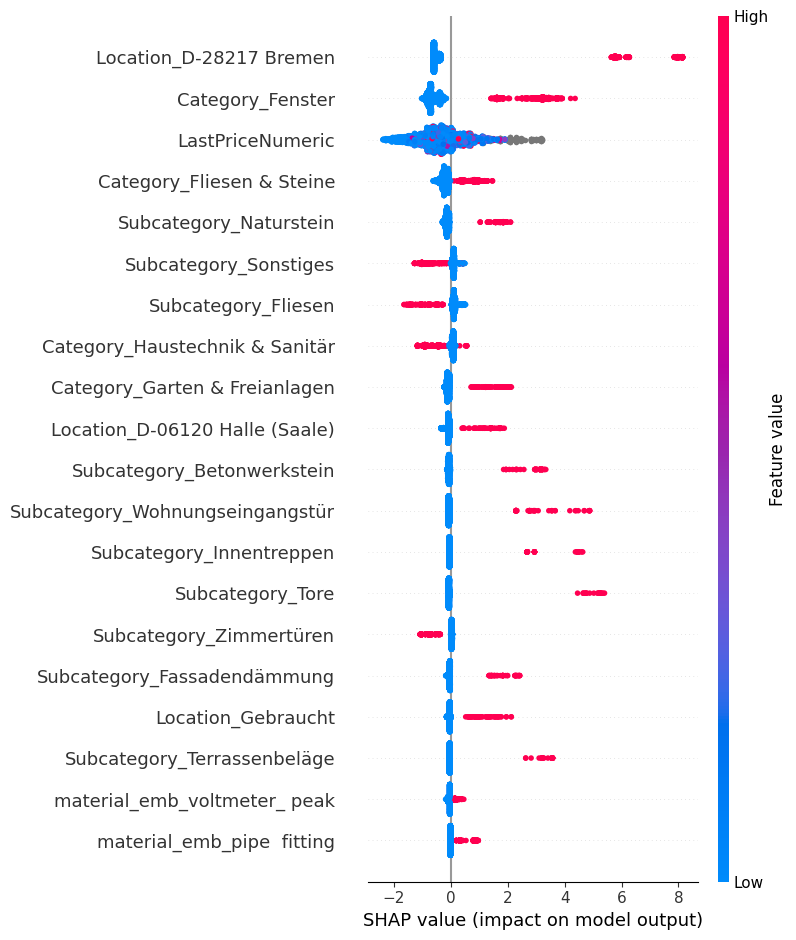

In [48]:
explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)


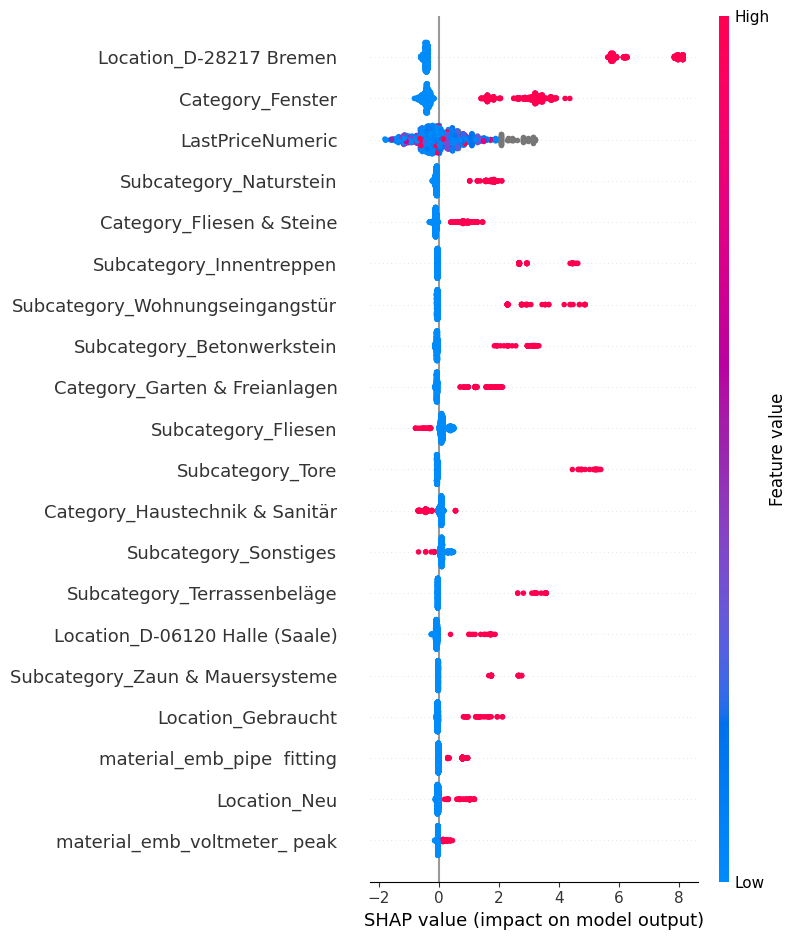

In [49]:
# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

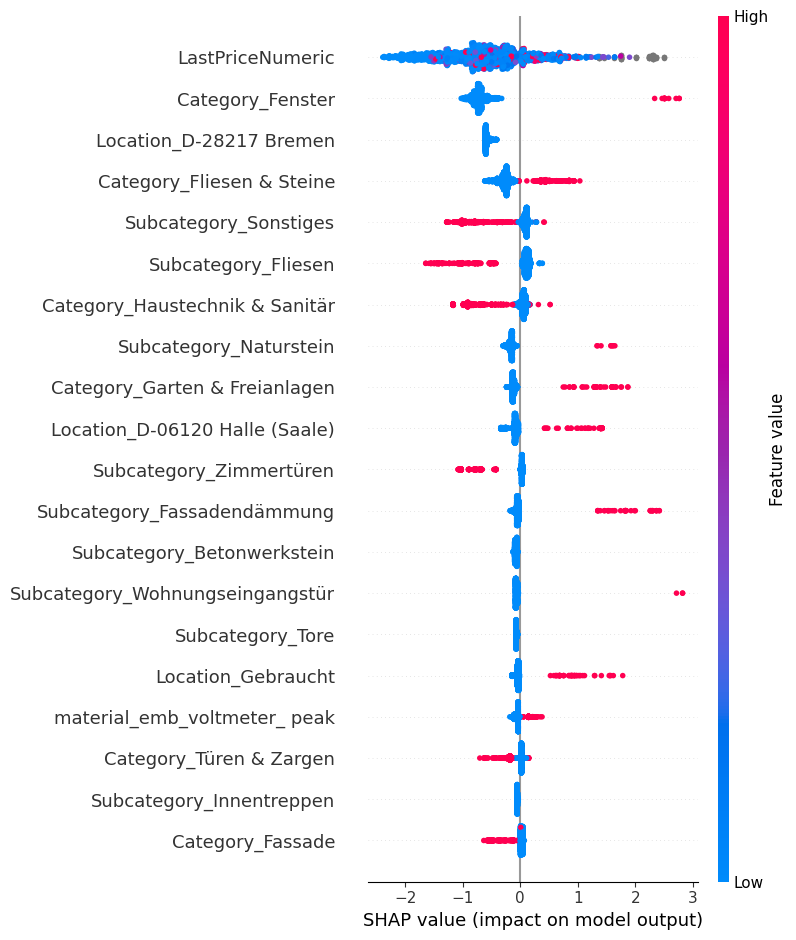

In [50]:
# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)


from sklearn.ensemble import HistGradientBoostingClassifier 

# Create and train the Random Forest classifier
model_rf = HistGradientBoostingClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("HistGradientBoostingClassifier  Accuracy:", accuracy_rf)
print("HistGradientBoostingClassifier  Report:\n", report_rf)


Random Forest Accuracy: 0.9266409266409267
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       507
         1.0       0.92      0.86      0.89       270

    accuracy                           0.93       777
   macro avg       0.93      0.91      0.92       777
weighted avg       0.93      0.93      0.93       777

HistGradientBoostingClassifier  Accuracy: 0.9214929214929215
HistGradientBoostingClassifier  Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       507
         1.0       0.91      0.86      0.88       270

    accuracy                           0.92       777
   macro avg       0.92      0.91      0.91       777
weighted avg       0.92      0.92      0.92       777



German Per component feature

Predicting the number of days to be sold is not good

In [204]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


german_date = []
count_entity = []
price_sold = []
cate = []
sub_cate = []
german_amount = []

for item in german.German_Raw.unique():
    german_df = german.dropna(subset="SoldAfterDays")
    date = german_df.SoldAfterDays[german_df.German_Raw == item]
    amount = german_df.LastAvailableNumeric[german_df.German_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    german_date.append(np.mean(date))
    german_amount.append(np.mean(amount))
 

In [205]:
def extract_and_modify(s):
    if pd.notna(s) and 'Pr_' in s:
        # Extract the desired substring
        extracted_str = '_'.join(s.split('_')[:3])
        
        return extracted_str
    elif pd.notna(s) and 'Ifc' in s:
        # Extract the desired substring
        return s
    else:
        return np.nan

In [206]:
len(german.German_Code.unique())

22

In [ ]:
german_date = []
count_entity = []
price_sold = []
cate = []
sub_cate = []
german_amount = []

for item in german.first_level.unique():
    german_df = german.dropna(subset="SoldAfterDays")
    date = german_df.SoldAfterDays[german_df.first_level == item]
    amount = german_df.LastAvailableNumeric[german_df.first_level == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    german_date.append(np.mean(date))
    german_amount.append(np.mean(amount))
 


df = pd.DataFrame({"first_level": german.first_level.unique(), "SoldAfterDays": german_date, "CountEntity":count_entity, "Average Amount":german_amount}).dropna()

df = df[df.CountEntity > 1]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)
df['Rank_Average_Amount'] = df['Average Amount'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = (df['Rank_SoldAfterDays'] + df['Rank_Average_Amount']+ df['Rank_CountEntity'])/3

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("1st_level_best_cat/german_components.csv")


german_date = []
count_entity = []
price_sold = []
cate = []
sub_cate = []
german_amount = []

for item in german.second_level.unique():
    german_df = german.dropna(subset="SoldAfterDays")
    date = german_df.SoldAfterDays[german_df.second_level == item]
    amount = german_df.LastAvailableNumeric[german_df.second_level == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    german_date.append(np.mean(date))
    german_amount.append(np.mean(amount))
 


df = pd.DataFrame({"first_level": german.second_level.unique(), "SoldAfterDays": german_date, "CountEntity":count_entity, "Average Amount":german_amount}).dropna()

df = df[df.CountEntity > 1]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)
df['Rank_Average_Amount'] = df['Average Amount'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = (df['Rank_SoldAfterDays'] + df['Rank_Average_Amount']+ df['Rank_CountEntity'])/3

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("2nd_level_best_cat/german_components.csv")



In [207]:
   
df = pd.DataFrame({"German_Raw": german.German_Raw.unique(),"German_Code": german.German_Code.unique(), "SoldAfterDays": german_date, "CountEntity":count_entity, "Average Amount":german_amount}).dropna()
df['German_Code_Parent']= df['German_Code'].apply(extract_and_modify)
df = pd.merge(df, uni_mat_pr[["Code", "Title"]], left_on='German_Code_Parent', right_on='Code', how='left')
df = pd.merge(df, german.groupby('German_Raw')['Imagefile'].agg(list).reset_index(), on='German_Raw', how='left')

df = df[df.CountEntity > 1]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)
df['Rank_Average_Amount'] = df['Average Amount'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = (df['Rank_SoldAfterDays'] + df['Rank_Average_Amount']+ df['Rank_CountEntity'])/3

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("german_components.csv")

In [208]:
successful_objects.to_csv("german_components.csv")

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import json
# Assuming 'successful_objects' dataframe contains the data
results = []

best_features = successful_objects.iloc[:15, :]  # Extracting top 15 features
german1 = german.copy()
german1 = german1.dropna(subset=["German_Code"])
for i in range(15):
    german_test = german1[german1.German_Code.str.contains(best_features.German_Code[i])]
    categorical_columns = ['Category', 'Subcategory', 'Location', 'Hersteller', 'German_Raw',"material_emb"]  # Update with your categorical columns
    german_test.Sold[german_test.SoldAfter!=1] = 0
    german_test.Sold[german_test.SoldAfter>0] = 1

    df = german_test[categorical_columns].copy()


    df_dummies = pd.get_dummies(df, columns=categorical_columns)

    # Separate features and target
    X = pd.concat([german_test.LastPriceNumeric, df_dummies], axis=1) # Replace 'Sold' with your target column name
    y = german_test['Sold']  # Target variable

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the XGBoost classifier
    model_xgb = xgb.XGBClassifier(random_state=42)
    model_xgb.fit(X_train, y_train)

    # Predict on the test set
    predictions = model_xgb.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    # Assuming 'target_variable' is your target variable column name
    importances = model_xgb.feature_importances_
    feature_names = X_train.columns
    # Create a DataFrame for easy visualization
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort the DataFrame by importance
    feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

    results.append({"Code":best_features.German_Code[i],"report": report, "features":feature_importances})
    

results = pd.DataFrame(results)
results.to_csv("classifications/classification_results_germany.csv")

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A va

ADD UPPER LEVEL FOR THE COMPONENTS 1st and 2nd

In [ ]:
import pandas as pd
import seaborn as sns

# Drop non-numeric columns before calculating correlation
numeric_columns = german.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = german[numeric_columns].corr().abs()

# Calculate the average correlation for each column
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Select the top 20 columns
top_20_columns = avg_correlation.head(20).index

# Get the correlation matrix for the top 20 columns
top_20_correlation_matrix = german[top_20_columns].corr()

# Display the top 20 correlation matrix
top_20_correlation_matrix

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_20_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Top 20 Correlated Features')
plt.show()

# Since we can't display the heatmap directly in this environment, we'll return the correlation matrix.
top_20_correlation_matrix

Nothing interesting here


### Danemark
#### No Date Available in the scraping

Index(['Unnamed: 0', 'Category', 'Category_1', 'Subcategory', 'Quantity', 'LastPrice',
        'Saved', 'LastUpOn', 'FirstPrice', 'PriceChange', 'Description',
        'Year of manufacture', 'Year of manufacture_unit',
        'For built-in', 'Over rebated', 'With angle hinges', 'Connected',
        'Press tested', 'Store', 'Country', 'Language', 'Danish_Raw'],
       dtype='object')
       

In [75]:
danish.Category.unique()

array(['Doors and  Windows', 'Lamps and Lighting', 'Timber and Floors',
       'Masonry Materials', 'Plumbing and Kitchen',
       'Miscellaneous Used Items'], dtype=object)

In [76]:
danish = danish[~danish["Category"].isin(['Lamps and Lighting','Plumbing and Kitchen'])]

In [77]:
print("The timeframe is ", min(danish.Saved), " to ", max(danish.LastUpOn))

The timeframe is  2023-03-02  to  2023-11-06


In [78]:
danish['Saved'] = pd.to_datetime(danish['Saved'])
danish['LastUpOn'] = pd.to_datetime(danish['LastUpOn'])
danish["SoldAfterDays"] = (danish["LastUpOn"] - danish["Saved"]).dt.days
danish["SoldAfterDays"][danish['LastUpOn'] == max(danish['LastUpOn'])] = np.nan

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [79]:
revenue = np.sum(danish.LastPrice[~danish.LastUpOn.isna()])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 6841622.75


In [80]:
# Calculate the percentage of NaN values in each column
nan_percentage = danish.isnull().mean()

# Drop columns with more than 50% NaN values
columns_to_drop = nan_percentage[nan_percentage > 0.5].index
df_dropped = danish.drop(columns=columns_to_drop)

danish = df_dropped
danish.Quantity =  danish.Quantity.str.extract(r'(\d+)')[0].astype(float)
danish["Sold"] = np.nan

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Subcategory', 'material_emb', 'Store', 'Danish_Raw']  # Update with your categorical columns
non_numeric_columns = ['Quantity', 'LastPrice']

danish.Sold[danish.SoldAfterDays!=1] = 0
danish.Sold[danish.SoldAfterDays>0] = 1

df = danish[categorical_columns].copy()


df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([danish[non_numeric_columns], df_dummies], axis=1) # Replace 'Sold' with your target column name
y = danish['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight=13)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Chain

Accuracy: 0.9408060453400504
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.13      0.23        53
         1.0       0.94      1.00      0.97       741

    accuracy                           0.94       794
   macro avg       0.91      0.57      0.60       794
weighted avg       0.94      0.94      0.92       794



Bad results recall and F1-score because we have a really imbalanced DataFrame with really little not sold items.

                                  Feature  Importance
40    Subcategory_Fyldningsdøre uden karm    0.048424
523  Danish_Raw_Uncontrolled door closers    0.042446
183                 material_emb_repeater    0.036742
92                 material_emb_capacitor    0.036200
52                    Subcategory_Mursten    0.033773
..                                    ...         ...
223                   material_emb_window    0.000000
222                  material_emb_whistle    0.000000
221            material_emb_wheel  sensor    0.000000
220          material_emb_waste  terminal    0.000000
564           Danish_Raw_Zinc core anodes    0.000000

[565 rows x 2 columns]


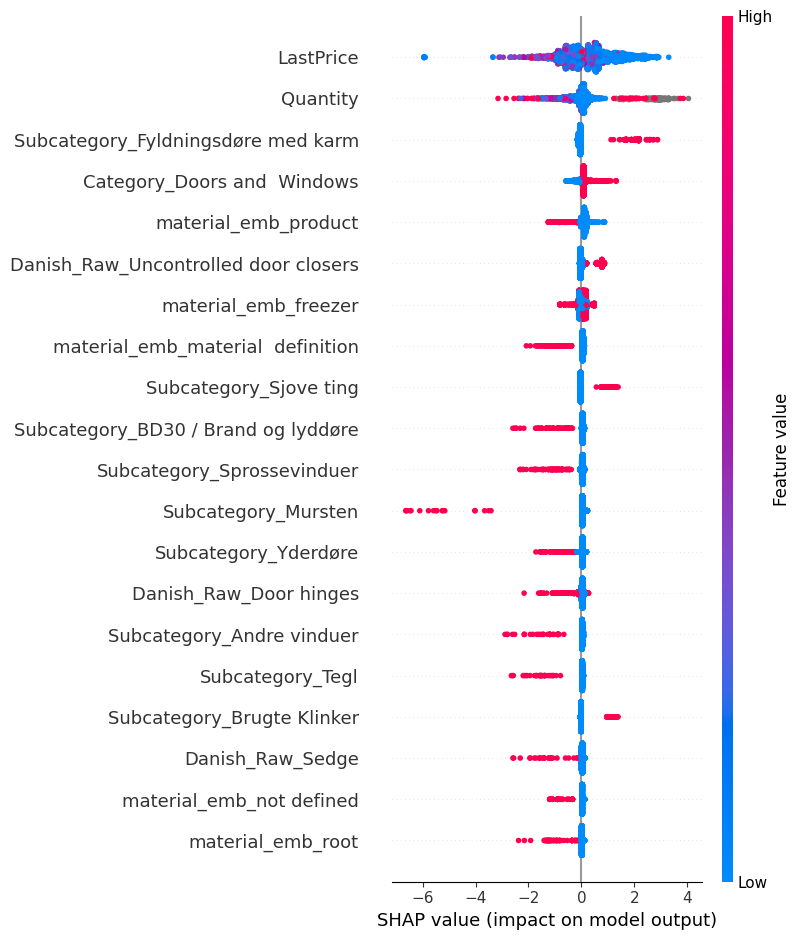

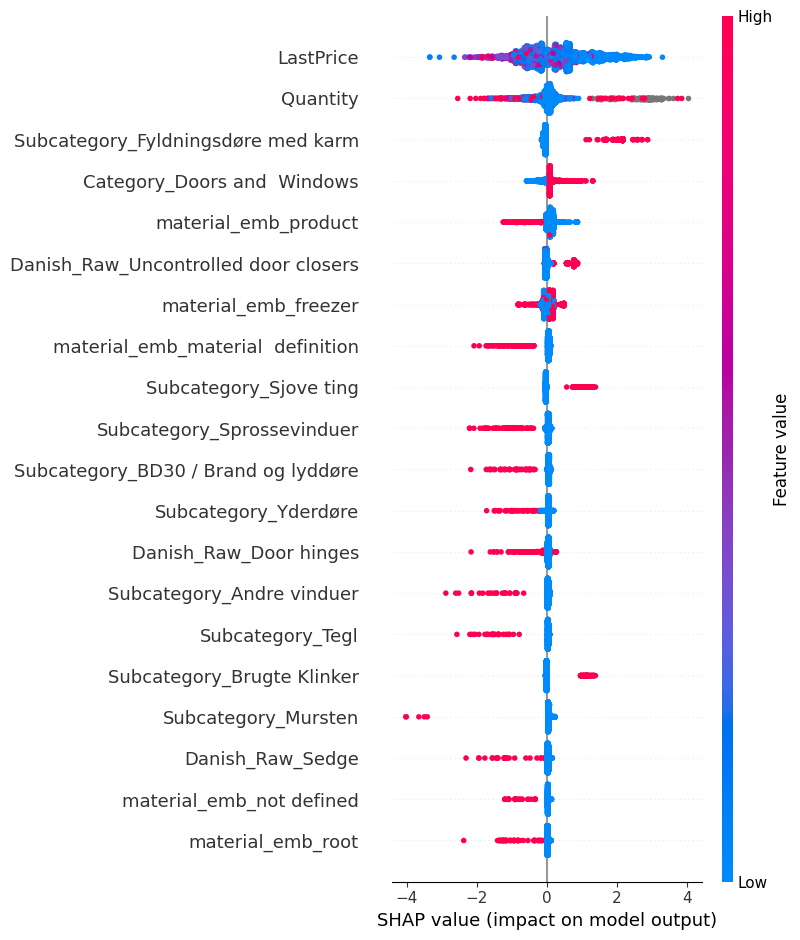

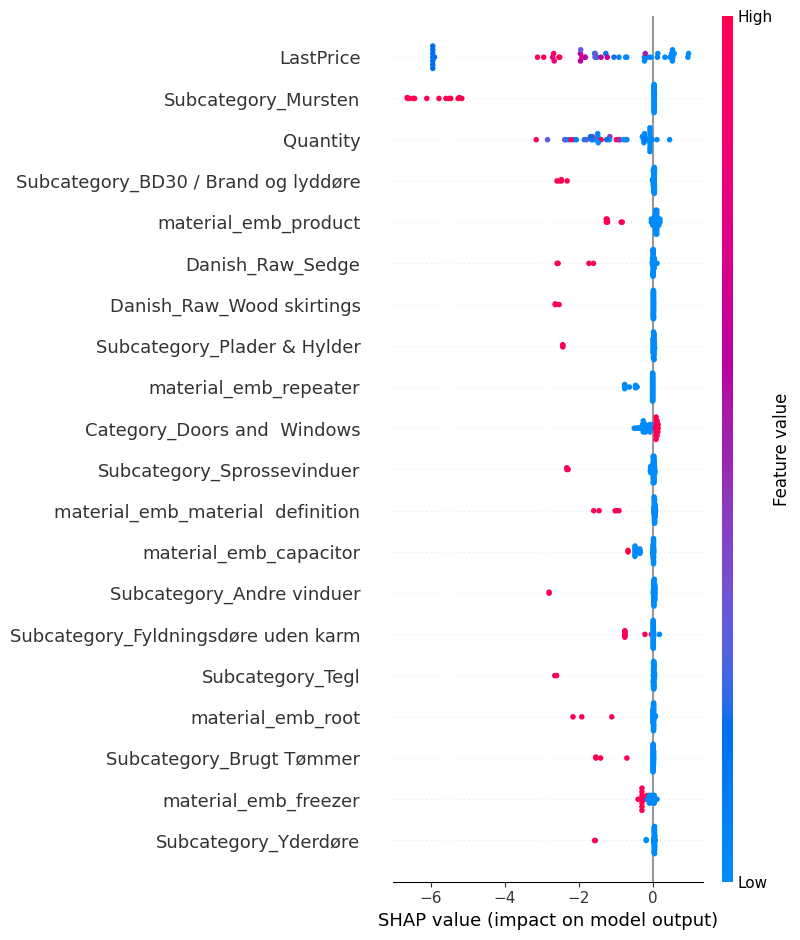

In [82]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.to_csv("tables/danish_importances.csv")

# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)


from sklearn.ensemble import HistGradientBoostingClassifier 

# Create and train the Random Forest classifier
model_rf = HistGradientBoostingClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("HistGradientBoostingClassifier  Accuracy:", accuracy_rf)
print("HistGradientBoostingClassifier  Report:\n", report_rf)


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


danish_reg = danish.dropna(subset=['SoldAfterDays'])
# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Subcategory', 'material_emb', 'Store', 'Danish_Raw']  # Update with your categorical columns
non_numeric_columns = ['Quantity', 'LastPrice']

df = danish_reg[categorical_columns].copy()

df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([danish_reg[non_numeric_columns], df_dummies], axis=1) # Replace 'Sold' with your target column name
y = danish_reg['SoldAfterDays']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBRegressor(random_state=42, scale_pos_weight=13)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Evaluate the predictions
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, mae, r2

Not good enough to predict days to be sold

In [319]:
"""import os

def get_filenames(url_list):
    filenames = []
    url_list=eval(url_list)
    if url_list and isinstance(url_list, list):
        for url in url_list:
            if url and isinstance(url, str):
                splitted = url.split('/')
                file_ = splitted[-1].split('.')
                file = file_[0] + "_" + splitted[-5] + "." + file_[1]
                filenames.append(file)
    return filenames

danish.Imagefile = danish['Imagefile'].apply(get_filenames)"""


TypeError: eval() arg 1 must be a string, bytes or code object

In [321]:
danish.columns

Index(['Category', 'Category_1', 'Subcategory', 'URL', 'Title', 'ID',
       'Imagefile', 'Bredde', 'Bredde_unit', 'Højde', 'Højde_unit', 'Tykkelse',
       'Tykkelse_unit', 'Quantity', 'LastPrice', 'Saved', 'LastUpOn', 'Store',
       'Country', 'Language', 'material_emb', 'Danish_Raw', 'Danish_Code',
       'first_level', 'second_level', 'third_level', 'SoldAfterDays', 'Sold'],
      dtype='object')

In [324]:
danish_date = []
count_entity = []
price_sold = []
for item in danish.first_level.unique():
    danish_df = danish.dropna(subset="SoldAfterDays")
    date = danish_df.SoldAfterDays[danish_df.first_level == item]

    count_entity.append(len(date))
    danish_date.append(np.mean(date))

df = pd.DataFrame({"first_level": danish.first_level.unique(), "SoldAfterDays": danish_date, "CountEntity":count_entity}).dropna()

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("1st_level_best_cat/danish_components.csv")


danish_date = []
count_entity = []
price_sold = []
for item in danish.second_level.unique():
    danish_df = danish.dropna(subset="SoldAfterDays")
    date = danish_df.SoldAfterDays[danish_df.second_level == item]

    count_entity.append(len(date))
    danish_date.append(np.mean(date))

df = pd.DataFrame({"second_level": danish.second_level.unique(), "SoldAfterDays": danish_date, "CountEntity":count_entity}).dropna()

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("2nd_level_best_cat/danish_components.csv")

danish_date = []
count_entity = []
price_sold = []
for item in danish.third_level.unique():
    danish_df = danish.dropna(subset="SoldAfterDays")
    date = danish_df.SoldAfterDays[danish_df.third_level == item]

    count_entity.append(len(date))
    danish_date.append(np.mean(date))

df = pd.DataFrame({"third_level": danish.third_level.unique(), "SoldAfterDays": danish_date, "CountEntity":count_entity}).dropna()

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("3rd_level_best_cat/danish_components.csv")

In [325]:
danish_date = []
count_entity = []
price_sold = []
for item in danish.Danish_Raw.unique():
    danish_df = danish.dropna(subset="SoldAfterDays")
    date = danish_df.SoldAfterDays[danish_df.Danish_Raw == item]

    count_entity.append(len(date))
    danish_date.append(np.mean(date))

df = pd.DataFrame({"Danish_Raw": danish.Danish_Raw.unique(),"Danish_Code": danish.Danish_Code.unique(), "SoldAfterDays": danish_date, "CountEntity":count_entity}).dropna()

df['Danish_Code_Parent']= df['Danish_Code'].apply(extract_and_modify)
df = pd.merge(df, uni_mat_pr[["Code", "Title"]], left_on='Danish_Code_Parent', right_on='Code', how='left')
df = pd.merge(df, danish.groupby('Danish_Raw')['Imagefile'].agg(list).reset_index(), on='Danish_Raw', how='left')

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("danish_components.csv")

In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import json
# Assuming 'successful_objects' dataframe contains the data
results = []

danish1 = danish.copy()
danish1 = danish1.dropna(subset=["Danish_Code", "Sold"])


best_features = successful_objects.iloc[:15, :].reset_index(drop=True)  # Extracting top 15 features

for i in range(10):
    danish_test = danish1[danish1.Danish_Code.str.contains(best_features.Danish_Code[i])]

    categorical_columns = ['Category', 'Subcategory', 'material_emb', 'Store', 'Danish_Raw']  # Update with your categorical columns
    non_numeric_columns = ['Quantity', 'LastPrice']

    danish_test['Sold'] = (danish_test['SoldAfterDays'] > 0).astype(int)  # Convert to binary Sold indicator

    df = danish_test[categorical_columns].copy()
    df_dummies = pd.get_dummies(df, columns=categorical_columns)

    # Separate features and target
    X = pd.concat([danish_test[non_numeric_columns], df_dummies], axis=1) # Replace 'Sold' with your target column name
    y = danish_test['Sold'].astype(int)  # Target variable

    if len(y[y==0])>2:
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Ensure y_train contains only expected classes
        # Create and train the XGBoost classifier
        model_xgb = xgb.XGBClassifier(random_state=42)
        model_xgb.fit(X_train, y_train)

        # Predict on the test set
        predictions = model_xgb.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions)

        # Get feature importances
        importances = model_xgb.feature_importances_
        feature_names = X_train.columns

        # Create a DataFrame for easy visualization
        feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

        # Sort the DataFrame by importance
        feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

        results.append({"Code":best_features.Danish_Code[i], "report": report, "features": feature_importances})

results = pd.DataFrame(results)
results.to_csv("classifications/classification_results_danish.csv")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predi

In [86]:
import re
def extract_numeric(s):
    # Find all numeric patterns in the string
    number = re.findall(r'\b\d+\b', str(s))
    # Return them as a space-separated string (or however you'd like to format it)
    if len(number)==0:
        return np.nan
    else: 
        return int(number[0])

danish.Quantity = danish.Quantity.apply(extract_numeric)

In [ ]:
import seaborn as sns

# Drop non-numeric columns before calculating correlation
numeric_columns = danish.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = danish[numeric_columns].corr().abs()

# Calculate the average correlation for each column
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Select the top 20 columns
top_20_columns = avg_correlation.head(20).index

# Get the correlation matrix for the top 20 columns
top_20_correlation_matrix = danish[top_20_columns].corr()

# Display the top 20 correlation matrix
top_20_correlation_matrix

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_20_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Top 20 Correlated Features')
plt.show()

# Since we can't display the heatmap directly in this environment, we'll return the correlation matrix.
top_20_correlation_matrix

### Belgium

In [106]:
belgium.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Title', 'Weight', 'Weight_Units',
       'Product_Units', 'Description', 'Category', 'URL', 'Imagefile',
       'Initial_Price', 'Latest_Price', 'Initial_Stock', 'Stock_Now',
       'Condition', 'Dates_Available', 'Material', 'Dimensions', 'Technical',
       'Collection', 'Last_Up_On', 'Price_Change', 'Quantity_Change', 'Date',
       'Country', 'Store', 'Language', 'Sold', 'Sold_After', 'material', 'dim',
       'quantity_n', 'material_emb', 'Belgium_Raw', 'Belgium_Code',
       'first_level', 'second_level', 'third_level'],
      dtype='object')

In [107]:
belgium.Category.unique()

array(['Bricks', 'Ceiling', 'Doors', 'Droguerie', 'Floors', 'Furniture',
       'Garden', 'Hardware', 'Insulation', 'Lighting', 'Objet Trouvé',
       'Per building', 'Sanitary', 'Stairs', 'Technical', 'Wall Cladding',
       'Wood', 'Cloisons', 'Electricités et luminaires', 'Insolite',
       'Matière brute', 'Mobilier', 'Portes et fenêtres', 'Quincaillerie',
       'Sanitaires', 'Scénographie', 'Sol et plafond', 'Techniques',
       'Per Building', 'Brick', 'Door', 'Floor', 'Maintenance', 'Roof'],
      dtype=object)

In [108]:
belgium.Last_Up_On = pd.to_datetime(belgium.Last_Up_On)
data = belgium.Last_Up_On.dropna()
print("Belgium Table starts the ", min(data), " and ends the ", max(data))

Belgium Table starts the  2022-08-02 00:00:00  and ends the  2023-02-11 00:00:00


In [109]:
belgium = belgium[~belgium["Category"].isin(['Electricités et luminaires','Insolite', 'Quincaillerie', 'Hardware', 'Lighting', 'Furniture'])]

In [110]:
belgium['Date'] = pd.to_datetime(belgium['Date'])
belgium['Last_Up_On'] = pd.to_datetime(belgium['Last_Up_On'])
belgium["SoldAfterDays"] = (belgium["Last_Up_On"] - belgium["Date"]).dt.days
belgium["SoldAfterDays"][belgium['Last_Up_On'] == max(belgium['Last_Up_On'])] = np.nan

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [111]:
revenue = np.sum(belgium.Latest_Price[~belgium.Last_Up_On.isna()])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 34608.25


In [341]:
belgium_date = []
count_entity = []
price_sold = []
for item in belgium.first_level.unique():
    belgium_df = belgium.dropna(subset="SoldAfterDays")
    date = belgium_df.SoldAfterDays[belgium_df.first_level == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    belgium_date.append(np.mean(date))

df_belgium = pd.DataFrame({"first_level": belgium.first_level.unique(), "SoldAfterDays": belgium_date, "CountEntity":count_entity}).dropna()
df_belgium['Rank_SoldAfterDays'] = df_belgium['SoldAfterDays'].rank(method='min', ascending=True)
df_belgium['Rank_CountEntity'] = df_belgium['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df_belgium['Score'] = (df_belgium['Rank_SoldAfterDays']) + df_belgium['Rank_CountEntity']
successful_objects = df_belgium.sort_values(by='Score', ascending=True)
successful_objects.to_csv("1st_level_best_cat/belgium_components.csv")

belgium_date = []
count_entity = []
price_sold = []
for item in belgium.second_level.unique():
    belgium_df = belgium.dropna(subset="SoldAfterDays")
    date = belgium_df.SoldAfterDays[belgium_df.second_level == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    belgium_date.append(np.mean(date))

df_belgium = pd.DataFrame({"second_level":belgium.second_level.unique(), "SoldAfterDays": belgium_date, "CountEntity":count_entity}).dropna()

df_belgium['Rank_SoldAfterDays'] = df_belgium['SoldAfterDays'].rank(method='min', ascending=True)
df_belgium['Rank_CountEntity'] = df_belgium['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df_belgium['Score'] = (df_belgium['Rank_SoldAfterDays']) + df_belgium['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df_belgium.sort_values(by='Score', ascending=True)
successful_objects.to_csv("2nd_level_best_cat/belgium_components.csv")


belgium_date = []
count_entity = []
price_sold = []
for item in belgium.third_level.unique():
    belgium_df = belgium.dropna(subset="SoldAfterDays")
    date = belgium_df.SoldAfterDays[belgium_df.third_level == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    belgium_date.append(np.mean(date))

df_belgium = pd.DataFrame({"third_level":belgium.third_level.unique(), "SoldAfterDays": belgium_date, "CountEntity":count_entity}).dropna()
df_belgium['Rank_SoldAfterDays'] = df_belgium['SoldAfterDays'].rank(method='min', ascending=True)
df_belgium['Rank_CountEntity'] = df_belgium['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df_belgium['Score'] = (df_belgium['Rank_SoldAfterDays']) + df_belgium['Rank_CountEntity']
successful_objects.to_csv("3rd_level_best_cat/belgium_components.csv")

In [336]:
belgium_date = []
count_entity = []
price_sold = []
for item in belgium.Belgium_Raw.unique():
    belgium_df = belgium.dropna(subset="SoldAfterDays")
    date = belgium_df.SoldAfterDays[belgium_df.Belgium_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    belgium_date.append(np.mean(date))

df_belgium = pd.DataFrame({"Belgium_Raw": belgium.Belgium_Raw.unique(),"Belgium_Code": belgium.Belgium_Code.unique(), "SoldAfterDays": belgium_date, "CountEntity":count_entity}).dropna()
df_belgium['Belgium_Code_Parent']= df_belgium['Belgium_Code'].apply(extract_and_modify)
df_belgium = pd.merge(df_belgium, uni_mat_pr[["Code", "Title"]], left_on='Belgium_Code_Parent', right_on='Code', how='left')
df_belgium = pd.merge(df_belgium, belgium.groupby('Belgium_Raw')['Imagefile'].agg(list).reset_index(), on='Belgium_Raw', how='left')
successful_objects.to_csv("belgium_components.csv")

In [329]:
belgium.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Title', 'Weight', 'Weight_Units',
       'Product_Units', 'Description', 'Category', 'URL', 'Imagefile',
       'Initial_Price', 'Latest_Price', 'Initial_Stock', 'Stock_Now',
       'Condition', 'Dates_Available', 'Material', 'Dimensions', 'Technical',
       'Collection', 'Last_Up_On', 'Price_Change', 'Quantity_Change', 'Date',
       'Country', 'Store', 'Language', 'Sold', 'Sold_After', 'material', 'dim',
       'quantity_n', 'material_emb', 'Belgium_Raw', 'Belgium_Code',
       'first_level', 'second_level', 'third_level', 'SoldAfterDays'],
      dtype='object')

In [331]:
average_weight_per_code = belgium.groupby('Belgium_Code')['Weight'].mean()
average_weight_per_code.to_csv("uniclass_weight.csv")

In [327]:
belgium['Weight'] = pd.to_numeric(belgium['Weight'].str.replace('[^0-9.]', '', regex=True).str.replace(',', ''), errors='coerce')
belgium['Initial_Price'] = pd.to_numeric(belgium['Initial_Price'].str.replace('[^0-9.]', '', regex=True).str.replace(',', ''), errors='coerce')

print(belgium[['Weight', 'Initial_Price']].dtypes)

AttributeError: Can only use .str accessor with string values!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['Category', 'Condition', "Belgium_Raw", 'material_emb']  # Update with your categorical columns
numeric_columns = ['Weight','Latest_Price']

df = belgium[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


# Separate features and target
X = df_dummies # Replace 'Sold' with your target column name
y = belgium['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Good

                              Feature  Importance
25  location_PARIS-13E-ARRONDISSEMENT    0.211340
14              location_LA MADELEINE    0.201023
5                   location_BRIANCON    0.147278
42             material_state_damaged    0.146455
70             BIM_class_D.50.20.02.6    0.096300
..                                ...         ...
34                    location_RENNES    0.000000
35                    location_RUNGIS    0.000000
36             location_SAINT-ETIENNE    0.000000
37                location_SAINT-OUEN    0.000000
75                 material_type_used    0.000000

[76 rows x 2 columns]


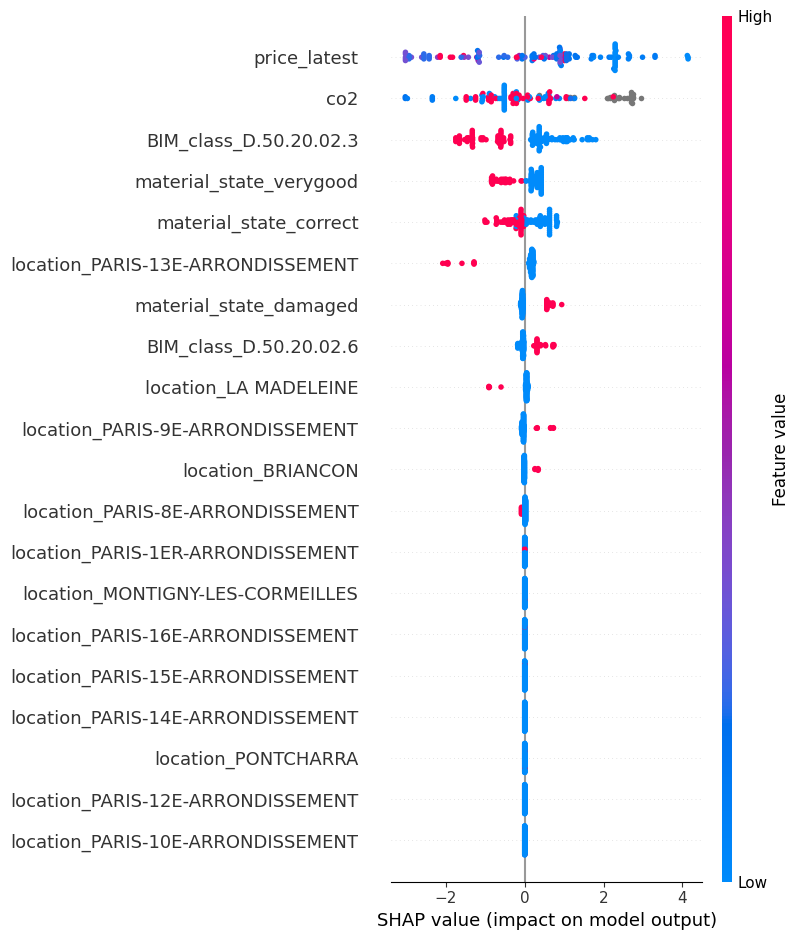

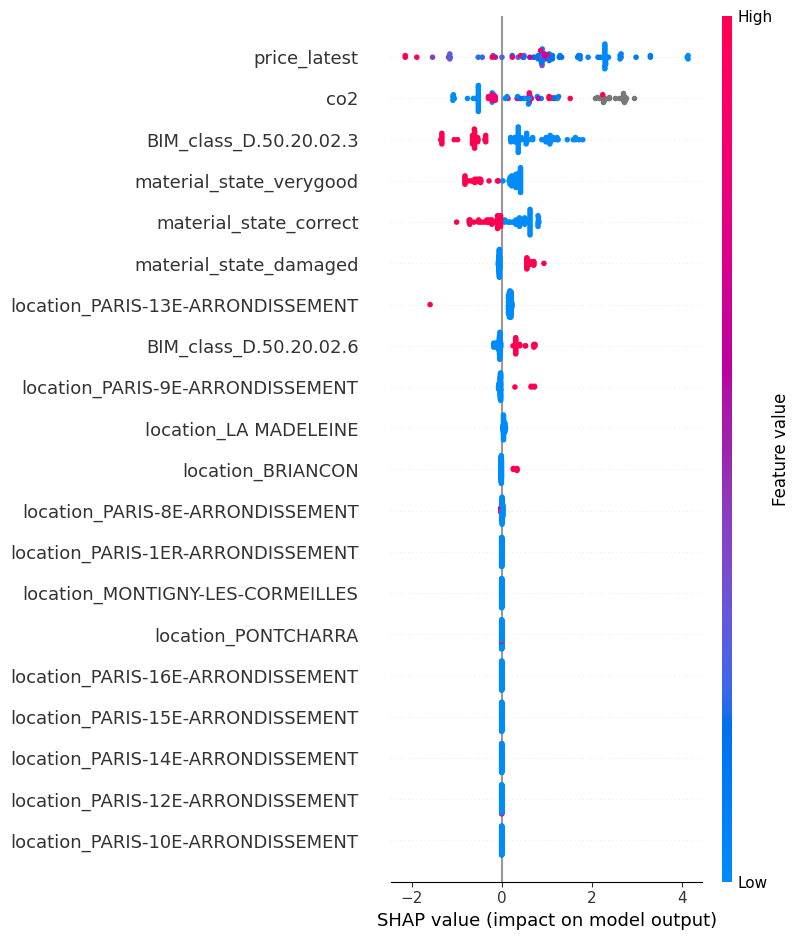

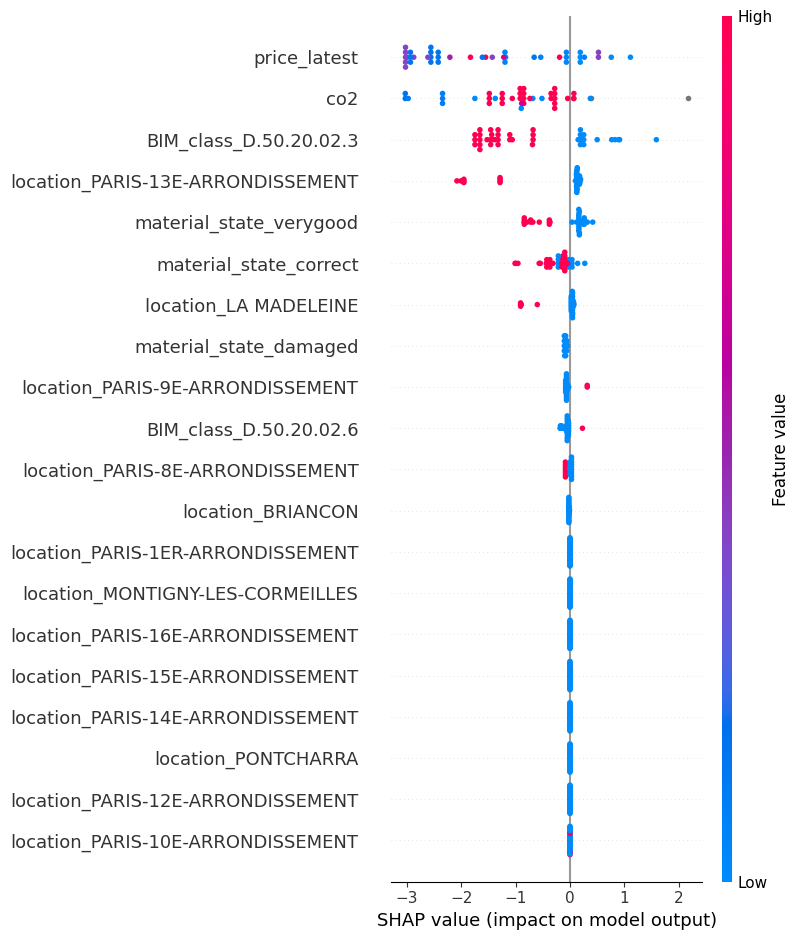

In [182]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.to_csv("tables/belgium_importances.csv")

# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [183]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)


from sklearn.ensemble import HistGradientBoostingClassifier 

# Create and train the Random Forest classifier
model_rf = HistGradientBoostingClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("HistGradientBoostingClassifier  Accuracy:", accuracy_rf)
print("HistGradientBoostingClassifier  Report:\n", report_rf)


Random Forest Accuracy: 0.8529411764705882
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.84      0.95      0.89        22

    accuracy                           0.85        34
   macro avg       0.86      0.81      0.83        34
weighted avg       0.86      0.85      0.85        34

HistGradientBoostingClassifier  Accuracy: 0.8235294117647058
HistGradientBoostingClassifier  Report:
               precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.81      0.95      0.88        22

    accuracy                           0.82        34
   macro avg       0.84      0.77      0.79        34
weighted avg       0.83      0.82      0.81        34



In [338]:
#df_belgium = df_belgium[df_belgium.CountEntity > 5]
df_belgium['Rank_SoldAfterDays'] = df_belgium['SoldAfterDays'].rank(method='min', ascending=True)
df_belgium['Rank_CountEntity'] = df_belgium['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df_belgium['Score'] = (df_belgium['Rank_SoldAfterDays']) + df_belgium['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df_belgium.sort_values(by='Score', ascending=True)
successful_objects.to_csv("belgium_components.csv")

In [339]:
successful_objects[['Belgium_Raw', 'SoldAfterDays', 'CountEntity', 'Score']]
successful_objects.to_csv("belgium_components.csv")

In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import json
# Assuming 'successful_objects' dataframe contains the data
results = []

belgium1 = belgium.copy()
belgium1 = belgium1.dropna(subset=["Belgium_Code", "Sold"])


best_features = successful_objects.iloc[:15, :].reset_index(drop=True)  # Extracting top 15 features

for i in range(10):
    belgium_test = belgium1[belgium1.Belgium_Code.str.contains(best_features.Belgium_Code[i])]

    categorical_columns = ['Category', 'Condition', "Belgium_Raw", 'material_emb']  # Update with your categorical columns
    numeric_columns = ['Weight','Latest_Price']

    df = belgium_test[categorical_columns+numeric_columns]

    df_dummies = pd.get_dummies(df, columns=categorical_columns)


    # Separate features and target
    X = df_dummies # Replace 'Sold' with your target column name
    y = belgium_test['Sold'].astype(int)  # Target variable

    if len(y[y==0])>2:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the XGBoost classifier
        model_xgb = xgb.XGBClassifier(random_state=42)
        model_xgb.fit(X_train, y_train)

        # Predict on the test set
        predictions = model_xgb.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions)

        # Get feature importances
        importances = model_xgb.feature_importances_
        feature_names = X_train.columns

        # Create a DataFrame for easy visualization
        feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

        # Sort the DataFrame by importance
        feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

        results.append({"Code":best_features.Belgium_Code[i], "report": report, "features": feature_importances})


results = pd.DataFrame(results)
results.to_csv("classifications/classification_results_belgium.csv")

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in la

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


belgium_reg = belgium.dropna(subset=['SoldAfterDays'])

# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Condition', "Belgium_Raw", 'material_emb']  # Update with your categorical columns
numeric_columns = ['Weight','Latest_Price']

df = belgium_reg[categorical_columns].copy()

df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([belgium_reg[numeric_columns], df_dummies], axis=1)
y = belgium_reg['SoldAfterDays']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBRegressor(random_state=42, scale_pos_weight=13)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Evaluate the predictions
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, mae, r2

Not good

In [ ]:
import pandas as pd
import seaborn as sns

correlation_matrix = X.corr().abs()

# Calculate the average correlation for each column
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Select the top 20 columns
top_20_columns = avg_correlation.head(20).index

# Get the correlation matrix for the top 20 columns
top_20_correlation_matrix = X[top_20_columns].corr()

# Display the top 20 correlation matrix
top_20_correlation_matrix

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_20_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Top 20 Correlated Features')
plt.show()

# Since we can't display the heatmap directly in this environment, we'll return the correlation matrix.
top_20_correlation_matrix

### French

In [154]:
french.location = french.location.astype(str)
french.sold[french.sold!=1] = 0
french.sold[french.sold>0] = 1


ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Chain

In [155]:
french.date_published = pd.to_datetime(french.date_published)
print("French Table starts the ", min(french.date_published), " and ends the ", max(french.date_published))

French Table starts the  2020-09-09 00:00:00  and ends the  2023-05-24 00:00:00


In [156]:
french.imagefiles

0       ['/upload/material/images/84c53165-3f30-4c10-b...
1       ['/upload/material/images/ca0a2dfe-b2c0-4e00-b...
2       ['/upload/material/images/a99320bf-f510-46e0-9...
3       ['/upload/material/images/70781524-b2e9-4b1e-a...
4       ['/upload/material/images/c3f04845-48da-4f7d-b...
                              ...                        
6142    ['/upload/material/images/a46d1c82-30ae-45f6-b...
6143    ['/upload/material/images/b4020162-3154-42e3-b...
6144    ['/upload/material/images/df197d2e-a35a-4400-9...
6145    ['/upload/material/images/43e4159d-f0bd-49b8-9...
6146                                                  NaN
Name: imagefiles, Length: 6147, dtype: object

In [157]:
revenue_idx = french.sold == 1
revenue = sum(french.price_latest[revenue_idx])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 458511.1000000002


In [158]:
french.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'title',
       'description', 'material_state', 'category', 'BIM_class', 'location',
       'date_published', 'price_initial', 'price_latest', 'price_change',
       'imagefiles', 'material_type', 'co2', 'avoided_waste',
       'quantity_initial', 'quantity_latest', 'disappeared', 'country', 'sold',
       'sold_after', 'city', 'deconstruction', 'state', 'constraints', 'price',
       'publishDate', 'images', 'distance', 'rseSummary', 'promotion',
       'source', 'conditioning', 'rate', 'diag_it', 'showroom',
       'avoidedWastes', 'trustLevel', 'quantity', 'min_quantity', 'end_date',
       'pickup_start_date', 'pickup_end_date', 'deposit_mode', 'date',
       'object', 'material', 'dim', 'quantity_n', 'material_emb', 'French_Raw',
       'French_Code', 'first_level', 'second_level', 'third_level'],
      dtype='object')

In [159]:
def get_filenames_fr(url_list):
    filenames = []
    if url_list and isinstance(url_list, str):
        url_list=eval(url_list)
        if url_list and isinstance(url_list, list):
            for url in url_list:
                if url and isinstance(url, str):
                    splitted = url.split('/')
                    file = splitted[-1]
                    filenames.append(file)
        return filenames

french['imagefiles'] = french['imagefiles'].apply(get_filenames_fr)


In [309]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['location', "French_Raw", "material_state", "BIM_class", "material_type", 'second_level', 'third_level']  # Update with your categorical columns
numeric_columns = ['price_latest', "co2"]
french.sold[french.sold!=1] = 0
french.sold[french.sold>0] = 1

df = french[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


# Separate features and target
X = df_dummies # Replace 'Sold' with your target column name
y = french['sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Chain

Accuracy: 0.8674796747967479
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       526
         1.0       0.90      0.86      0.88       704

    accuracy                           0.87      1230
   macro avg       0.86      0.87      0.87      1230
weighted avg       0.87      0.87      0.87      1230



                                              Feature  Importance
103                  location_PARIS-9E-ARRONDISSEMENT    0.074440
85                         location_NEUILLY-SUR-SEINE    0.046203
98                  location_PARIS-1ER-ARRONDISSEMENT    0.033002
106                                  location_PUTEAUX    0.026177
95                  location_PARIS-15E-ARRONDISSEMENT    0.025557
...                                               ...         ...
475                     French_Raw_Stone stair treads    0.000000
474                            French_Raw_Stone slabs    0.000000
473                         French_Raw_Stilling tubes    0.000000
471                             French_Raw_Step lifts    0.000000
1287  third_level_Wire structure and general products    0.000000

[1288 rows x 2 columns]


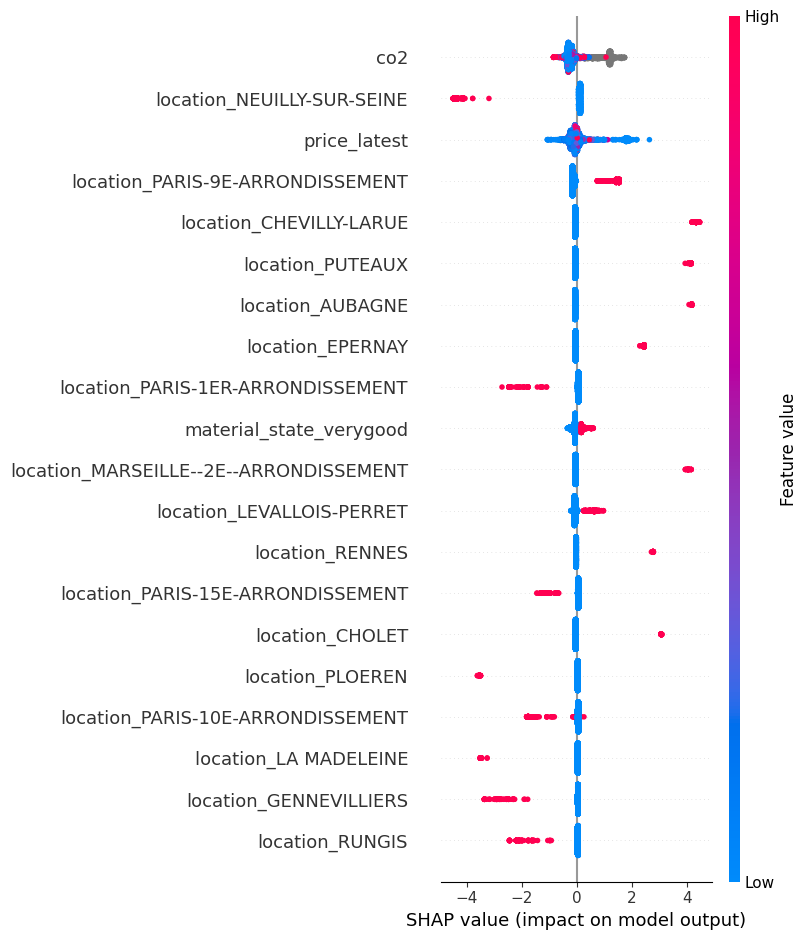

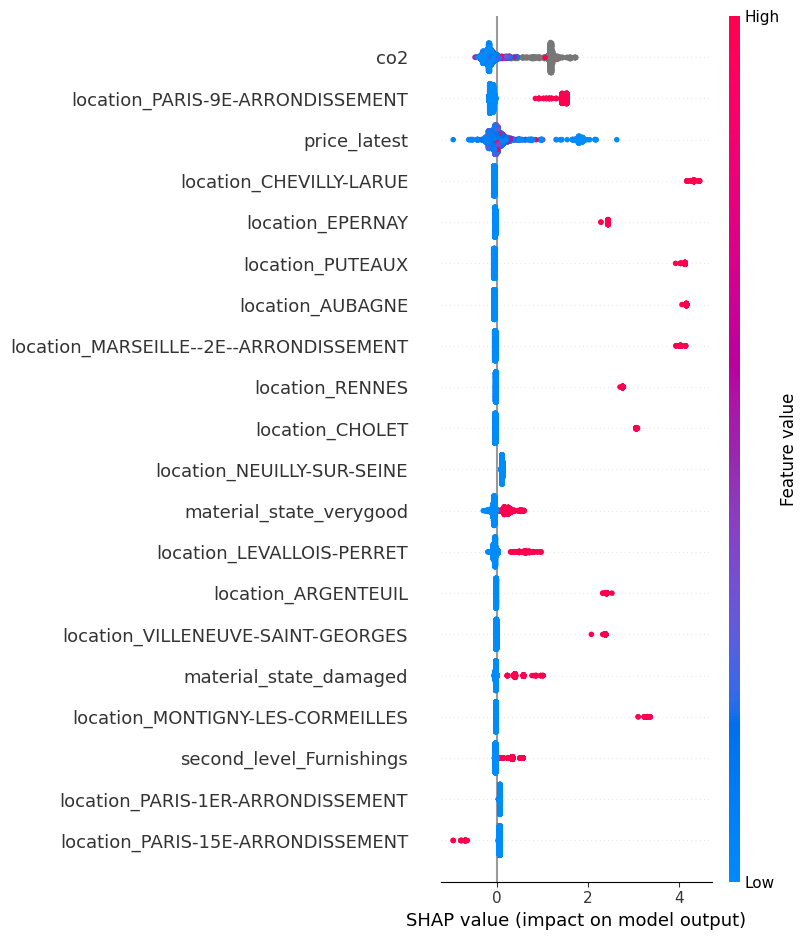

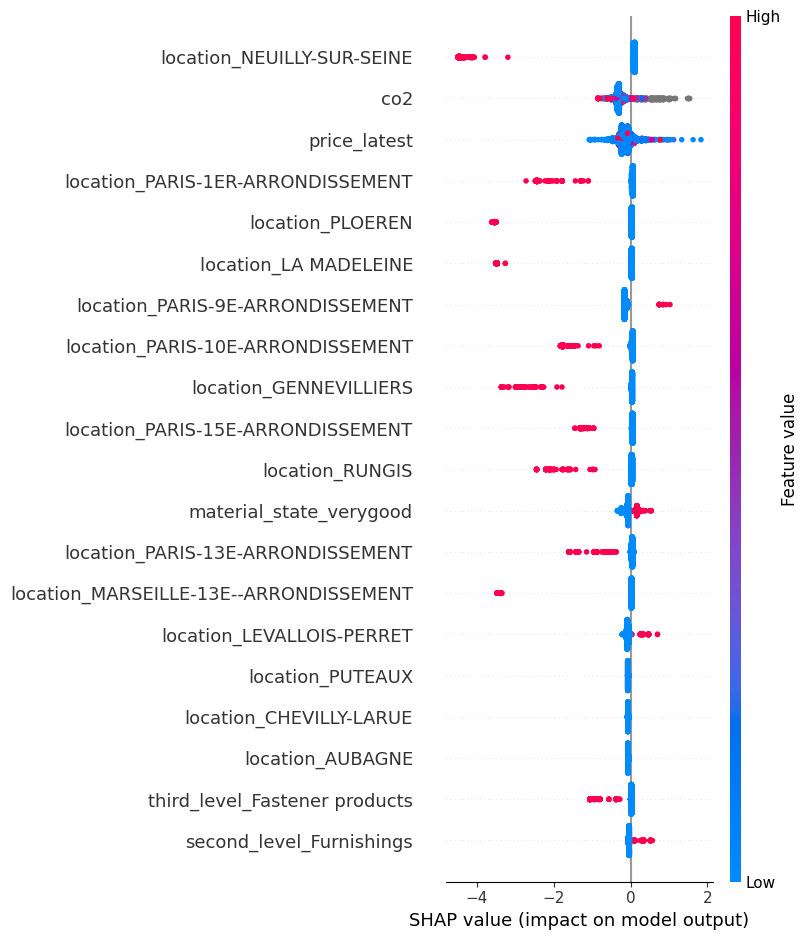

In [310]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.to_csv("tables/french_importances.csv")

# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [311]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)


from sklearn.ensemble import HistGradientBoostingClassifier 

# Create and train the Random Forest classifier
model_rf = HistGradientBoostingClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("HistGradientBoostingClassifier  Accuracy:", accuracy_rf)
print("HistGradientBoostingClassifier  Report:\n", report_rf)


Random Forest Accuracy: 0.8406504065040651
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       526
         1.0       0.84      0.89      0.86       704

    accuracy                           0.84      1230
   macro avg       0.84      0.83      0.84      1230
weighted avg       0.84      0.84      0.84      1230

HistGradientBoostingClassifier  Accuracy: 0.8520325203252033
HistGradientBoostingClassifier  Report:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       526
         1.0       0.89      0.85      0.87       704

    accuracy                           0.85      1230
   macro avg       0.85      0.85      0.85      1230
weighted avg       0.85      0.85      0.85      1230



In [218]:
french.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'title',
       'description', 'material_state', 'category', 'BIM_class', 'location',
       'date_published', 'price_initial', 'price_latest', 'price_change',
       'imagefiles', 'material_type', 'co2', 'avoided_waste',
       'quantity_initial', 'quantity_latest', 'disappeared', 'country', 'sold',
       'sold_after', 'city', 'deconstruction', 'state', 'constraints', 'price',
       'publishDate', 'images', 'distance', 'rseSummary', 'promotion',
       'source', 'conditioning', 'rate', 'diag_it', 'showroom',
       'avoidedWastes', 'trustLevel', 'quantity', 'min_quantity', 'end_date',
       'pickup_start_date', 'pickup_end_date', 'deposit_mode', 'date',
       'object', 'material', 'dim', 'quantity_n', 'material_emb', 'French_Raw',
       'French_Code', 'first_level', 'second_level', 'third_level'],
      dtype='object')

In [332]:
french_date = []
count_entity = []
price_sold = []
for item in french.first_level.unique():
    french_df = french.dropna(subset="sold_after")
    date = french_df.sold_after[french_df.first_level == item]

    count_entity.append(len(date))
    french_date.append(np.mean(date))

df = pd.DataFrame({"first_level": french.first_level.unique(), "SoldAfterDays": french_date, "CountEntity":count_entity}).dropna()

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("1st_level_best_cat/french_components.csv")

french_date = []
count_entity = []
price_sold = []
for item in french.second_level.unique():
    french_df = french.dropna(subset="sold_after")
    date = french_df.sold_after[french_df.second_level == item]

    count_entity.append(len(date))
    french_date.append(np.mean(date))

df = pd.DataFrame({"second_level": french.second_level.unique(), "SoldAfterDays": french_date, "CountEntity":count_entity}).dropna()

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("2nd_level_best_cat/french_components.csv")

french_date = []
count_entity = []
price_sold = []
for item in french.third_level.unique():
    french_df = french.dropna(subset="sold_after")
    date = french_df.sold_after[french_df.third_level == item]

    count_entity.append(len(date))
    french_date.append(np.mean(date))

df = pd.DataFrame({"third_level": french.third_level.unique(), "SoldAfterDays": french_date, "CountEntity":count_entity}).dropna()

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("3rd_level_best_cat/french_components.csv")

In [219]:
french_date = []
count_entity = []
price_sold = []
for item in french.French_Raw.unique():
    french_df = french.dropna(subset="sold_after")
    date = french_df.sold_after[french_df.French_Raw == item]

    count_entity.append(len(date))
    french_date.append(np.mean(date))

df = pd.DataFrame({"French_Raw": french.French_Raw.unique(),"French_Code": french.French_Code.unique(), "SoldAfterDays": french_date, "CountEntity":count_entity}).dropna()

df['French_Code_Parent']= df['French_Code'].apply(extract_and_modify)
df = pd.merge(df, uni_mat_pr[["Code", "Title"]], left_on='French_Code_Parent', right_on='Code', how='left')
df = pd.merge(df, french.groupby('French_Raw')['imagefiles'].agg(list).reset_index(), on='French_Raw', how='left')

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects[['French_Raw', 'SoldAfterDays', 'CountEntity', 'Score']]
successful_objects.to_csv("french_components.csv")

In [221]:
successful_objects.to_csv("french_components.csv")

In [222]:
french.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'title',
       'description', 'material_state', 'category', 'BIM_class', 'location',
       'date_published', 'price_initial', 'price_latest', 'price_change',
       'imagefiles', 'material_type', 'co2', 'avoided_waste',
       'quantity_initial', 'quantity_latest', 'disappeared', 'country', 'sold',
       'sold_after', 'city', 'deconstruction', 'state', 'constraints', 'price',
       'publishDate', 'images', 'distance', 'rseSummary', 'promotion',
       'source', 'conditioning', 'rate', 'diag_it', 'showroom',
       'avoidedWastes', 'trustLevel', 'quantity', 'min_quantity', 'end_date',
       'pickup_start_date', 'pickup_end_date', 'deposit_mode', 'date',
       'object', 'material', 'dim', 'quantity_n', 'material_emb', 'French_Raw',
       'French_Code', 'first_level', 'second_level', 'third_level'],
      dtype='object')

In [312]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import json
# Assuming 'successful_objects' dataframe contains the data
results = []

french1 = french.copy()
french1 = french1.dropna(subset=["French_Code", "sold"])


best_features = successful_objects.iloc[:15, :].reset_index(drop=True)  # Extracting top 15 features

for i in range(10):
    french_test = french1[french1.French_Code.str.contains(best_features.French_Code[i])]

    categorical_columns = ['location', "French_Raw", "material_state", "BIM_class", "material_type", 'second_level', 'third_level']  # Update with your categorical columns
    numeric_columns = ['price_latest', "co2"]

    df = french_test[categorical_columns+numeric_columns]

    df_dummies = pd.get_dummies(df, columns=categorical_columns)


    # Separate features and target
    X = df_dummies # Replace 'Sold' with your target column name
    y = french_test['sold'].astype(int)  # Target variable

    if len(y[y==0])>2:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the XGBoost classifier
        model_xgb = xgb.XGBClassifier(random_state=42)
        model_xgb.fit(X_train, y_train)

        # Predict on the test set
        predictions = model_xgb.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions)

        # Get feature importances
        importances = model_xgb.feature_importances_
        feature_names = X_train.columns

        # Create a DataFrame for easy visualization
        feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

        # Sort the DataFrame by importance
        feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

        results.append({"Code":best_features.French_Code[i], "report": report, "features": feature_importances})


results = pd.DataFrame(results)
results.to_csv("classifications/classification_results_french.csv")

AttributeError: 'DataFrame' object has no attribute 'French_Code'

In [ ]:
best_objects = df.sort_values(by='Score', ascending=True)
best_objects[:20]

In [ ]:
worst_objects = df.sort_values(by='Score', ascending=False)
worst_objects[:20]

In [ ]:
import pandas as pd
import seaborn as sns

correlation_matrix = X.corr().abs()

# Calculate the average correlation for each column
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Select the top 20 columns
top_20_columns = avg_correlation.head(20).index

# Get the correlation matrix for the top 20 columns
top_20_correlation_matrix = X[top_20_columns].corr()

# Display the top 20 correlation matrix
top_20_correlation_matrix

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_20_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Top 20 Correlated Features')
plt.show()

# Since we can't display the heatmap directly in this environment, we'll return the correlation matrix.
top_20_correlation_matrix

### Swiss

In [ ]:
swiss.columns

In [ ]:
swiss.Category.unique()

In [ ]:
swiss.Availability = pd.to_datetime(swiss.Availability, infer_datetime_format=True, errors='coerce')
date = swiss.Availability.dropna()
print("Dateframe ", min(date), " to ", max(date))

In [ ]:
swiss.Saved = pd.to_datetime(swiss.Saved)

data = sorted(list(french.date_published))
print("French Table starts the " + str(data[0]) + " and ends the " + str(data[-1]))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['Category', "Swiss_Raw", "Condition", "Subcategory", "Material", "Energy_Efficiency", 'second_level', 'third_level']  # Update with your categorical columns
numeric_columns = ['LastPrice', "Quantity"]
swiss.Sold[swiss.Sold!=1] = 0
swiss.Sold[swiss.Sold>0] = 1

df = swiss[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


# Separate features and target
X = df_dummies # Replace 'Sold' with your target column name
y = swiss['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

In [ ]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.to_csv("tables/swiss_importances.csv")

# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)


from sklearn.ensemble import HistGradientBoostingClassifier 

# Create and train the Random Forest classifier
model_rf = HistGradientBoostingClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("HistGradientBoostingClassifier  Accuracy:", accuracy_rf)
print("HistGradientBoostingClassifier  Report:\n", report_rf)


In [334]:
swiss_date = []
count_entity = []
price_sold = []
for item in swiss.first_level.unique():
    swiss_df = swiss.dropna(subset="SoldAfter")
    date = swiss_df.SoldAfter[swiss_df.first_level == item]

    count_entity.append(len(date))
    swiss_date.append(np.mean(date))

df = pd.DataFrame({"first_level": swiss.first_level.unique(), "SoldAfterDays": swiss_date, "CountEntity":count_entity}).dropna()

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("1st_level_best_cat/swiss_components.csv")

swiss_date = []
count_entity = []
price_sold = []
for item in swiss.second_level.unique():
    swiss_df = swiss.dropna(subset="SoldAfter")
    date = swiss_df.SoldAfter[swiss_df.second_level == item]

    count_entity.append(len(date))
    swiss_date.append(np.mean(date))

df = pd.DataFrame({"second_level": swiss.second_level.unique(), "SoldAfterDays": swiss_date, "CountEntity":count_entity}).dropna()

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("2nd_level_best_cat/swiss_components.csv")

swiss_date = []
count_entity = []
price_sold = []
for item in swiss.third_level.unique():
    swiss_df = swiss.dropna(subset="SoldAfter")
    date = swiss_df.SoldAfter[swiss_df.third_level == item]

    count_entity.append(len(date))
    swiss_date.append(np.mean(date))

df = pd.DataFrame({"third_level": swiss.third_level.unique(), "SoldAfterDays": swiss_date, "CountEntity":count_entity}).dropna()

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects.to_csv("3rd_level_best_cat/swiss_components.csv")

In [313]:
swiss_date = []
count_entity = []
price_sold = []
for item in swiss.Swiss_Raw.unique():
    swiss_df = swiss.dropna(subset="SoldAfter")
    date = swiss_df.SoldAfter[swiss_df.Swiss_Raw == item]

    count_entity.append(len(date))
    swiss_date.append(np.mean(date))

df = pd.DataFrame({"Swiss_Raw": swiss.Swiss_Raw.unique(),"Swiss_Code": swiss.Swiss_Code.unique(), "SoldAfterDays": swiss_date, "CountEntity":count_entity}).dropna()
df['Swiss_Code_Parent']= df['Swiss_Code'].apply(extract_and_modify)
df = pd.merge(df, uni_mat_pr[["Code", "Title"]], left_on='Swiss_Code_Parent', right_on='Code', how='left')
df = pd.merge(df, swiss.groupby('Swiss_Raw')['Imagefile'].agg(list).reset_index(), on='Swiss_Raw', how='left')

df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects[:20]
successful_objects.to_csv("swiss_components.csv")

In [314]:
df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects[:20]
successful_objects.to_csv("swiss_components.csv")

In [226]:
worst_objects = df.sort_values(by='Score', ascending=False)
worst_objects[:20]

,Swiss_Raw,Swiss_Code,SoldAfterDays,CountEntity,Swiss_Code_Parent,Code,Title,Imagefile,Rank_SoldAfterDays,Rank_CountEntity,Score
57,Doorsets,Pr_30_59_24,143.833333,6,Pr_30_59,Pr_30_59,Openings and opening component products,"[20211014_152218_570x570.jpg, 111417_570x570.j...",63.0,62.0,125.0
65,Under-mounted washbasins,Pr_40_20_96_92,139.500000,6,Pr_40_20,Pr_40_20,Sanitary fittings and accessories,"[nan, 20211027_143638-kopie_570x570.jpg, 1_%28...",60.0,62.0,122.0
187,Mirrors,Pr_40_30_53,131.000000,6,Pr_40_30,Pr_40_30,Fittings,"[20191011_113235_570x570.jpg, 1816_570x570.jpg...",58.0,62.0,120.0
176,Window hinges,Pr_30_36_36_96,158.285714,7,Pr_30_36,Pr_30_36,Hardware products,"[20211201_093921_570x570.jpg, img_0241_570x570...",66.0,53.0,119.0
127,Shower doors,Pr_40_20_06_80,167.875000,8,Pr_40_20,Pr_40_20,Sanitary fittings and accessories,"[img_3443_570x570.jpg, 20200311_083430_570x570...",68.0,50.0,118.0
157,Concrete bollards,Pr_20_76_08_19,128.833333,6,Pr_20_76,Pr_20_76,Sectional products,"[nan, 1_%28265%29_570x570.jpg, b1dd5b7e-180f-4...",54.0,62.0,116.0
152,Countertop washbasins,Pr_40_20_96_18,160.500000,10,Pr_40_20,Pr_40_20,Sanitary fittings and accessories,"[20210618_161607_570x570.jpg, 20200304_084213_...",67.0,38.0,105.0
42,Electric boilers,Pr_60_60_08_27,121.857143,7,Pr_60_60,Pr_60_60,Heating and cooling source products,"[1_%2851%29_570x570.jpg, nan, 2573_1_570x570.j...",51.0,53.0,104.0
67,Shower enclosures,Pr_40_20_06_79,136.222222,9,Pr_40_20,Pr_40_20,Sanitary fittings and accessories,"[nan, 20180611_164541_570x570.jpg, sam_8834_57...",59.0,41.0,100.0
35,Baths,Pr_40_20_06_08,129.888889,9,Pr_40_20,Pr_40_20,Sanitary fittings and accessories,"[nan, dsc01151_570x570.jpg, img_3130_570x570.j...",56.0,41.0,97.0


In [227]:
revenue_idx = swiss.Sold == 1
revenue = sum(swiss.LastPrice[revenue_idx])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 1149785.0


In [229]:
swiss.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Title', 'Condition', 'eBKP_H',
       'eBKP_H_EN', 'MateriuumCategory', 'Category', 'Category_1',
       'Subcategory', 'Description', 'Material', 'Length', 'Width', 'Height',
       'Diameter', 'Weight', 'Color', 'Energy_Efficiency', 'Availability',
       'FirstPrice', 'PriceOnDemand', 'Quantity', 'Saved', 'LastPrice',
       'LastUpOn', 'PriceChange', 'Sold', 'SoldAfter', 'Location', 'Provider',
       'Store', 'ID', 'Country', 'Language', 'Imagefile', 'URL',
       'eBKP_H_Generalized', 'ElementType', 'Price', 'Stock', 'Dimensions',
       'material', 'dim', 'quantity_n', 'material_emb', 'Swiss_Raw',
       'Swiss_Code', 'first_level', 'second_level', 'third_level'],
      dtype='object')

In [315]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import json
# Assuming 'successful_objects' dataframe contains the data
results = []

swiss1 = swiss.copy()
swiss1 = swiss1.dropna(subset=["Swiss_Code", "Sold"])


best_features = successful_objects.iloc[:15, :].reset_index(drop=True)  # Extracting top 15 features

for i in range(10):
    swiss_test = swiss1[swiss1.Swiss_Code.str.contains(best_features.Swiss_Code[i])]

    categorical_columns = ['Category', "Swiss_Raw", "Condition", "Subcategory", "Material", "Energy_Efficiency", 'second_level', 'third_level']  # Update with your categorical columns
    numeric_columns = ['LastPrice', "Quantity"]

    df = swiss_test[categorical_columns+numeric_columns]

    df_dummies = pd.get_dummies(df, columns=categorical_columns)


    # Separate features and target
    X = df_dummies # Replace 'Sold' with your target column name
    y = swiss_test['Sold'].astype(int)  # Target variable

    if len(y[y==0])>2:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the XGBoost classifier
        model_xgb = xgb.XGBClassifier(random_state=42)
        model_xgb.fit(X_train, y_train)

        # Predict on the test set
        predictions = model_xgb.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions)

        # Get feature importances
        importances = model_xgb.feature_importances_
        feature_names = X_train.columns

        # Create a DataFrame for easy visualization
        feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

        # Sort the DataFrame by importance
        feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

        results.append({"Code":best_features.Swiss_Code[i], "report": report, "features": feature_importances})


results = pd.DataFrame(results)
results.to_csv("classifications/classification_results_swiss.csv")

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## UK


In [ ]:
uk.columns

In [244]:
uk.DateOfListing = pd.to_datetime(uk.DateOfListing, infer_datetime_format=True, errors='coerce')
uk.LastUpOn = pd.to_datetime(uk.LastUpOn, infer_datetime_format=True, errors='coerce')

print("Dateframe ", min(uk.LastUpOn), " to ", max(uk.LastUpOn))

Dateframe  2023-03-13 00:00:00  to  2023-11-04 00:00:00


The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.


In [245]:
uk['DateOfListing'] = pd.to_datetime(uk['DateOfListing'])
uk['LastUpOn'] = pd.to_datetime(uk['LastUpOn'])
uk = uk.dropna(subset=['DateOfListing','LastUpOn']) 

In [246]:
uk["SoldAfterDays"] = (uk["LastUpOn"] - uk["DateOfListing"]).dt.days
uk["SoldAfterDays"][uk['LastUpOn'] == max(uk['LastUpOn'])] = np.nan
uk["Sold"] = [0 if row == max(uk['LastUpOn']) else 1 for row in uk['LastUpOn'].to_list()]

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [247]:
def extract_numeric(s):
    # Find all numeric patterns in the string
    s = s.replace(',', '')
    number = re.findall(r'\b\d+\b', str(s))
    # Return them as a space-separated string (or however you'd like to format it)
    if len(number)==0:
        return np.nan
    else: 
        return int(number[0])

uk.Price = uk.Price.apply(extract_numeric)


In [248]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\abder\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [249]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['Category', "Uk_Raw", "Subcategory", "material_emb", "Location"]  # Update with your categorical columns
numeric_columns = ['Price']
df = uk[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


X = df_dummies # Replace 'Sold' with your target column name
y = uk['Sold']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

predictions = model_xgb.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



Not relevant since not enough data is available 

In [287]:
revenue_idx = uk.Sold == 1
revenue = sum(uk.Price[revenue_idx])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 139116


In [288]:
french_merging = french.copy()
belgium_merging = belgium.copy()
german_merging = german.copy()
danish_merging = danish.copy()
swiss_merging = swiss.copy()
uk_merging = uk.copy()


In [289]:
danish.columns

Index(['Category', 'Category_1', 'Subcategory', 'URL', 'Title', 'ID',
       'Imagefile', 'Bredde', 'Bredde_unit', 'Højde', 'Højde_unit', 'Tykkelse',
       'Tykkelse_unit', 'Quantity', 'LastPrice', 'Saved', 'LastUpOn', 'Store',
       'Country', 'Language', 'material_emb', 'Danish_Raw', 'Danish_Code',
       'first_level', 'second_level', 'third_level', 'SoldAfterDays', 'Sold'],
      dtype='object')

In [290]:
french.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'title',
       'description', 'material_state', 'category', 'BIM_class', 'location',
       'date_published', 'price_initial', 'price_latest', 'price_change',
       'imagefiles', 'material_type', 'co2', 'avoided_waste',
       'quantity_initial', 'quantity_latest', 'disappeared', 'country', 'sold',
       'sold_after', 'city', 'deconstruction', 'state', 'constraints', 'price',
       'publishDate', 'images', 'distance', 'rseSummary', 'promotion',
       'source', 'conditioning', 'rate', 'diag_it', 'showroom',
       'avoidedWastes', 'trustLevel', 'quantity', 'min_quantity', 'end_date',
       'pickup_start_date', 'pickup_end_date', 'deposit_mode', 'date',
       'object', 'material', 'dim', 'quantity_n', 'material_emb', 'French_Raw',
       'French_Code', 'first_level', 'second_level', 'third_level'],
      dtype='object')

In [291]:
french_merging = french_merging[['title', 'category',  'price_latest', 'material_emb', 'French_Raw', 'sold',"sold_after", "imagefiles", 'second_level', 'third_level']].reset_index().drop(columns=["index"])
french_merging.columns = ["Title", "Category", "Price", "Material", "Code", "Sold", "Days", "Imagefile", 'second_level', 'third_level'] 
french_merging

,Title,Category,Price,Material,Code,Sold,Days,Imagefile,second_level,third_level
0,Table,ovens,10.0,electric generator,Occasional tables,1.0,266.0,[84c53165-3f30-4c10-b281-ff358f8e2114.jpeg],Furnishings,Sectional products
1,Projecteur,lighting_general_equipment,13.0,user defined,Projectors,1.0,95.0,[ca0a2dfe-b2c0-4e00-bf13-faabd43e891e.jpeg],Other,Other
2,Porte simple manuelle,simple_solid_doors,60.0,freezer,Pliable conduit,1.0,70.0,"[a99320bf-f510-46e0-9f18-aac75899427e.jpeg, 14...","Stairs, Ramps, Lift, Hardware",Sanitary fittings and accessories
3,Main courante seule,handrail,35.0,freezer,NaN,0.0,527.0,[70781524-b2e9-4b1e-a170-39e81f198eca.jpeg],Other,Handrails
4,Isolation laine de verre,other_coating,5.0,structural activity,Glass fins,1.0,38.0,"[c3f04845-48da-4f7d-bdb8-ea08f1b8953f.jpeg, 48...","Blocks, Panels, Fences, Bricks",Glass blocks and panels
...,...,...,...,...,...,...,...,...,...,...
6142,Porte simple manuelle,solid_exterior_door,81.0,freezer,Pliable conduit,0.0,143.0,[a46d1c82-30ae-45f6-bdbb-0bb2530d9dde.jpg],"Stairs, Ramps, Lift, Hardware",Sanitary fittings and accessories
6143,Chaudière à gaz collective,hot_water_boiler,1500.0,battery,Commercial gas griddles,0.0,143.0,"[b4020162-3154-42e3-b705-99e6eee56314.jpg, cf9...","Blocks, Panels, Fences, Bricks",Air and fume distribution products
6144,Porte simple manuelle,simple_solid_doors,61.0,freezer,Pliable conduit,0.0,143.0,[df197d2e-a35a-4400-90df-53efe30dc6db.jpg],"Stairs, Ramps, Lift, Hardware",Sanitary fittings and accessories
6145,sur pied,WC,15.0,product,Steppers,0.0,130.0,[43e4159d-f0bd-49b8-9ca4-f2021d5d4b72.jpg],"Stairs, Ramps, Lift, Hardware",Treads and landing units


In [292]:
danish_merging.columns

Index(['Category', 'Category_1', 'Subcategory', 'URL', 'Title', 'ID',
       'Imagefile', 'Bredde', 'Bredde_unit', 'Højde', 'Højde_unit', 'Tykkelse',
       'Tykkelse_unit', 'Quantity', 'LastPrice', 'Saved', 'LastUpOn', 'Store',
       'Country', 'Language', 'material_emb', 'Danish_Raw', 'Danish_Code',
       'first_level', 'second_level', 'third_level', 'SoldAfterDays', 'Sold'],
      dtype='object')

In [293]:
swiss_merging = swiss_merging[['Title', 'Category',  'Price', 'material_emb', 'Swiss_Raw', 'Sold', "SoldAfter", 'Imagefile', 'second_level', 'third_level']].reset_index().drop(columns=["index"])
swiss_merging.columns = ["Title", "Category",  "Price", "Material", "Code", "Sold","Days", 'Imagefile', 'second_level', 'third_level'] 
swiss_merging

,Title,Category,Price,Material,Code,Sold,Days,Imagefile,second_level,third_level
0,Fenster -fache Festverglasung,Gebäudehülle & Konstruktion,NaN,pavement,Window walls,1.0,18.0,NaN,"Door, Windows, Gates",Glass blocks and panels
1,Handtuchradiator,Gebäudetechnik & Sanitär,NaN,freezer,Hand dryers,1.0,265.0,20210109_134530_570x570.jpg,Other,Sanitary fittings and accessories
2,.-/HS/Toc-Duo-,Gebäudetechnik & Sanitär,NaN,switchboard,NaN,1.0,265.0,20200629_133129_570x570.jpg,Other,Structural units
3,Radiator,Gebäudetechnik & Sanitär,NaN,building element part,Radiators,1.0,265.0,1_%2812%29_570x570.png,Other,Space heating and cooling products
4,.m Marmor Mosaik,Ausbau,NaN,two position,Stone tiles,1.0,265.0,bad_570x570.jpg,"Blocks, Panels, Fences, Bricks","Floor plates, gratings and edgings"
...,...,...,...,...,...,...,...,...,...,...
4237,Duschkabine mit Wanne,Gebäudetechnik & Sanitär,0.0,window,Toilet showers,NaN,NaN,image_%2876%29_570x570.jpg,Other,Sanitary fittings and accessories
4238,Spiegelschrank -türig von Sidler,Gebäudetechnik & Sanitär,150.0,voltmeter_ peak,NaN,NaN,NaN,img_0883_570x570.jpg,Furnishings,"Lighting columns, brackets and bollards"
4239,Spiegelschrank -türig von Sidler,Gebäudetechnik & Sanitär,200.0,voltmeter_ peak,NaN,NaN,NaN,img_0871_570x570.jpg,Furnishings,"Lighting columns, brackets and bollards"
4240,Spiegelschrank -türig von Sidler,Gebäudetechnik & Sanitär,200.0,voltmeter_ peak,NaN,NaN,NaN,img_0867_570x570.jpg,Furnishings,"Lighting columns, brackets and bollards"


In [294]:
german_merging = german_merging[['Title', 'Category', 'LastPriceNumeric', 'material_emb', 'German_Raw', 'Sold', "SoldAfterDays", "Imagefile", 'second_level', 'third_level']].reset_index().drop(columns=["index"])
german_merging.columns = ["Title", "Category", "Price", "Material", "Code", "Sold","Days", "Imagefile", 'second_level', 'third_level'] 
german_merging

,Title,Category,Price,Material,Code,Sold,Days,Imagefile,second_level,third_level
0,Eigenbau,Türen & Zargen,1.00,element component,Door hinges,0.0,NaN,[https://restado.de/wp-content/uploads/product...,"Door, Windows, Gates",Glass blocks and panels
1,Stabile Holztür,Türen & Zargen,NaN,element component,Door hinges,1.0,4.0,[https://restado.de/wp-content/uploads/product...,"Door, Windows, Gates",Glass blocks and panels
2,Haustüre -teilig,Türen & Zargen,2300.00,element component,Door hinges,1.0,136.0,[https://restado.de/wp-content/uploads/product...,"Door, Windows, Gates",Glass blocks and panels
3,Bayerwald,Türen & Zargen,999.00,element component,Door hinges,0.0,NaN,[https://restado.de/wp-content/uploads/product...,"Door, Windows, Gates",Glass blocks and panels
4,Tür,Türen & Zargen,200.00,element component,Door hinges,0.0,NaN,[https://restado.de/wp-content/uploads/product...,"Door, Windows, Gates",Glass blocks and panels
...,...,...,...,...,...,...,...,...,...,...
3877,Bergmann Unipor Planziegel,Rohbau,1.40,bridge,Bouldering walls,0.0,NaN,[],"Blocks, Panels, Fences, Bricks",Walling units
3878,Bergmann Unipor Planziegel,Rohbau,1.80,bridge,Bouldering walls,0.0,NaN,[],"Blocks, Panels, Fences, Bricks",Walling units
3879,Knauf,Fassade,3648.00,root,Sprigs,0.0,NaN,[https://restado.de/wp-content/uploads/product...,"Covering, Finish",Headwall and swale inlet products
3880,FassaFassadenverkleidung für den Innen und Auß...,Fassade,8.21,freezer,Wardrobes,0.0,NaN,[https://restado.de/wp-content/uploads/product...,Furnishings,Sanitary fittings and accessories


In [295]:
danish_merging = danish_merging[['Title', 'Category', 'LastPrice', 'material_emb', 'Danish_Raw', 'Sold',"SoldAfterDays", 'Imagefile', 'second_level', 'third_level']].reset_index().drop(columns=["index"])
danish_merging.columns = ["Title", "Category", "Price", "Material", "Code", "Sold", "Days", 'Imagefile', 'second_level', 'third_level'] 
danish_merging

,Title,Category,Price,Material,Code,Sold,Days,Imagefile,second_level,third_level
0,Altandørsparti,Doors and Windows,4500.0,product,Arrises,1.0,246.0,"[267838_8.jpg, 267838_2.jpg, 267838_8.jpg, 267...","Door, Windows, Gates",Furnishings
1,Stalddør med sidevindue,Doors and Windows,6000.0,element component,Door hinges,1.0,7.0,"[267792_2.jpg, 267792_0.jpg, 267792_1.jpg, 267...","Door, Windows, Gates",Glass blocks and panels
2,Yderdør med med karm,Doors and Windows,4200.0,freezer,Concealed hinges,1.0,245.0,"[267676_6.jpg, 267676_6.jpg, 267676_7.jpg, 267...","Door, Windows, Gates",Furnishings
3,Yderdør med karm,Doors and Windows,1800.0,freezer,Door hinges,1.0,128.0,"[267675_5.jpg, 267675_1.jpg, 267675_2.jpg, 267...","Door, Windows, Gates",Safety cages
4,Yderdør med karm,Doors and Windows,2600.0,freezer,Door hinges,1.0,1.0,"[267724_4.jpg, 267724_6.jpg, 267724_4.jpg]","Door, Windows, Gates",Safety cages
...,...,...,...,...,...,...,...,...,...,...
3963,Grøn marmorflise - samlet parti,Timber and Floors,7500.0,capacitor,NaN,1.0,5.0,[],"Blocks, Panels, Fences, Bricks","Floor plates, gratings and edgings"
3964,Håndklædehylde,Miscellaneous Used Items,275.0,freezer,Towels,0.0,NaN,"[268542_2.jpg, 268542_8.jpg, 268542_9.jpg, 268...",Furnishings,Sanitary fittings and accessories
3965,"Laboratorieskab - Højrehængt , cm",Miscellaneous Used Items,300.0,voltmeter_ peak,NaN,0.0,NaN,"[267482_2.JPG, 267482_0.JPG, 267482_4.JPG, 267...","Floors, Ceiling",Sanitary fittings and accessories
3966,"Laboratorieskab - Venstrehængt , cm",Miscellaneous Used Items,300.0,voltmeter_ peak,NaN,0.0,NaN,"[267483_3.jpg, 267483_0.jpg, 267483_7.jpg, 267...","Floors, Ceiling",Walling units


In [296]:
uk_merging.columns

Index(['Name', 'URL', 'Price', 'Business', 'Category', 'Subcategory',
       'Country', 'Location', 'Description', 'Dimensions', 'Age', 'ItemID',
       'SellerID', 'SellersStockID', 'DateOfListing', 'Imagefiles', 'LastUpOn',
       'material_emb', 'Uk_Raw', 'Uk_Code', 'first_level', 'second_level',
       'third_level', 'SoldAfterDays', 'Sold'],
      dtype='object')

In [297]:
uk.columns

Index(['Name', 'URL', 'Price', 'Business', 'Category', 'Subcategory',
       'Country', 'Location', 'Description', 'Dimensions', 'Age', 'ItemID',
       'SellerID', 'SellersStockID', 'DateOfListing', 'Imagefiles', 'LastUpOn',
       'material_emb', 'Uk_Raw', 'Uk_Code', 'first_level', 'second_level',
       'third_level', 'SoldAfterDays', 'Sold'],
      dtype='object')

In [298]:
uk_merging = uk_merging[['Name', 'Category', 'Price', 'material_emb', 'Uk_Raw', 'Sold',"SoldAfterDays", 'Imagefiles', 'second_level', 'third_level']].reset_index().drop(columns=["index"])
uk_merging.columns = ["Title", "Category", "Price", "Material", "Code", "Sold","Days", 'Imagefile', 'second_level', 'third_level'] 
uk_merging

,Title,Category,Price,Material,Code,Sold,Days,Imagefile,second_level,third_level
0,Reclaimed Old Pitch Pine Solid Internal Door -,Antique & Reclaimed,99,wirepair segment,Wood panelled door leaves,1,286.0,None,"Door, Windows, Gates",Sanitary fittings and accessories
1,Old Original Antique Cast Iron Canopy Shower Bath,Antique & Reclaimed,6750,structural surface reaction,NaN,1,490.0,None,Other,Sanitary fittings and accessories
2,Antique Crittall Arched Fan Light Panels Avail...,Antique & Reclaimed,420,element component,NaN,1,229.0,None,Furnishings,"Lighting columns, brackets and bollards"
3,Spectacular Large Antique Crystal Chandelier,Antique & Reclaimed,2400,sign,Chandeliers,1,788.0,None,Other,"Lighting columns, brackets and bollards"
4,Antique Art Nouveau Cast Iron Tiled Fireplace ...,Antique & Reclaimed,950,vibration isola tor,NaN,1,214.0,None,"Blocks, Panels, Fences, Bricks","Floor plates, gratings and edgings"
...,...,...,...,...,...,...,...,...,...,...
120,Vintage Wooden Toy Jeep,Antique & Reclaimed,72,opticalcable segment,NaN,1,936.0,None,Other,Other
121,Reclaimed Solid Brass Beehive Escutcheons,Antique & Reclaimed,20,structural reaction,NaN,1,1059.0,None,Other,Trim products
122,Antique Early Edwardian Maple & Co Mahogany Ch...,Antique & Reclaimed,450,scanner,Wood architraves,1,1304.0,None,Furnishings,Masonry walling units
123,Reclaimed Teak / Iroko Worktop cm,Antique & Reclaimed,520,medical device,NaN,1,1452.0,None,Other,Other


In [299]:
belgium.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Title', 'Weight', 'Weight_Units',
       'Product_Units', 'Description', 'Category', 'URL', 'Imagefile',
       'Initial_Price', 'Latest_Price', 'Initial_Stock', 'Stock_Now',
       'Condition', 'Dates_Available', 'Material', 'Dimensions', 'Technical',
       'Collection', 'Last_Up_On', 'Price_Change', 'Quantity_Change', 'Date',
       'Country', 'Store', 'Language', 'Sold', 'Sold_After', 'material', 'dim',
       'quantity_n', 'material_emb', 'Belgium_Raw', 'Belgium_Code',
       'first_level', 'second_level', 'third_level', 'SoldAfterDays'],
      dtype='object')

In [300]:
belgium_merging = belgium_merging[['Title', 'Category', 'Latest_Price', 'material_emb', 'Belgium_Raw', 'Sold',"SoldAfterDays", 'Imagefile', 'second_level', 'third_level']].reset_index().drop(columns=["index"])
belgium_merging.columns = ["Title", "Category", "Price", "Material", "Code", "Sold","Days", 'Imagefile', 'second_level', 'third_level'] 
belgium_merging

,Title,Category,Price,Material,Code,Sold,Days,Imagefile,second_level,third_level
0,Brusselse klampsteen brick,Bricks,549.00,bridge,NaN,1,4.0,NaN,"Blocks, Panels, Fences, Bricks",Walling units
1,`` Beerse Steen `` brick,Bricks,0.82,caisson foundation,NaN,1,146.0,NaN,Other,Other
2,Beerse Steen rijnvorm brick,Bricks,0.90,humidif ier,Baryte bricks,0,NaN,NaN,"Blocks, Panels, Fences, Bricks",Masonry walling units
3,Batches of yellow bricks,Bricks,68.00,covering,Engineering bricks,1,146.0,NaN,"Blocks, Panels, Fences, Bricks",Prefabricated buildings and structures
4,Batch of concrete building blocks,Bricks,59.00,covering,Aggregate concrete blocks,0,NaN,NaN,"Blocks, Panels, Fences, Bricks",Prefabricated buildings and structures
...,...,...,...,...,...,...,...,...,...,...
803,Laminated birch plywood x cm,Wood,15.00,wirepair segment,Laminboard core plywoods,0,NaN,"['60758_ca234d4.png', '14574_0a89468.png', '14...","Floors, Ceiling","Non-rigid sheet, mat and strip covering and fi..."
804,Laminated birch plywood x cm,Wood,7.00,wirepair segment,Laminboard core plywoods,0,NaN,"['60757_ca234d4.png', '14578_f647387.png', '14...","Floors, Ceiling","Non-rigid sheet, mat and strip covering and fi..."
805,Laminated birch plywood x cm,Wood,12.00,wirepair segment,Laminboard core plywoods,0,NaN,"['60755_ca234d4.png', '14580_c22c070.png', '14...","Floors, Ceiling","Non-rigid sheet, mat and strip covering and fi..."
806,Laminated birch plywood x cm,Wood,19.00,wirepair segment,Laminboard core plywoods,0,NaN,"['60754_ca234d4.png', '14576_45c696f.png', '14...","Floors, Ceiling","Non-rigid sheet, mat and strip covering and fi..."


Stats of not sold element fo reach category


In [301]:
merged_table = pd.concat([french_merging,belgium_merging, danish_merging, swiss_merging, german_merging, uk_merging], ignore_index=True)
merged_table = merged_table.dropna(subset=["Code"]).reset_index().drop(columns=["index"])

In [302]:
merged_table = merged_table.dropna(subset=["Sold"])

In [303]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ["Category", "Material", "Code", 'second_level', 'third_level']  # Update with your categorical columns
numeric_columns = ['Price']
df = merged_table[categorical_columns+numeric_columns]
df_dummies = pd.get_dummies(df, columns=categorical_columns)


X = df_dummies # Replace 'Sold' with your target column name
y = merged_table['Sold']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

predictions = model_xgb.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8287416232315711
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.69      0.74       941
         1.0       0.84      0.91      0.87      1745

    accuracy                           0.83      2686
   macro avg       0.82      0.80      0.81      2686
weighted avg       0.83      0.83      0.83      2686



                                      Feature  Importance
11                Category_Doors and  Windows    0.070914
14                           Category_Fenster    0.061008
1256                           Code_Tundishes    0.058832
27          Category_Miscellaneous Used Items    0.030986
33                            Category_Rohbau    0.029544
...                                       ...         ...
549   Code_Concrete balusters and newel posts    0.000000
548       Code_Concrete access cover seatings    0.000000
547                     Code_Concealed hinges    0.000000
546               Code_Composite window walls    0.000000
704      Code_Firefighting valves and devices    0.000000

[1409 rows x 2 columns]


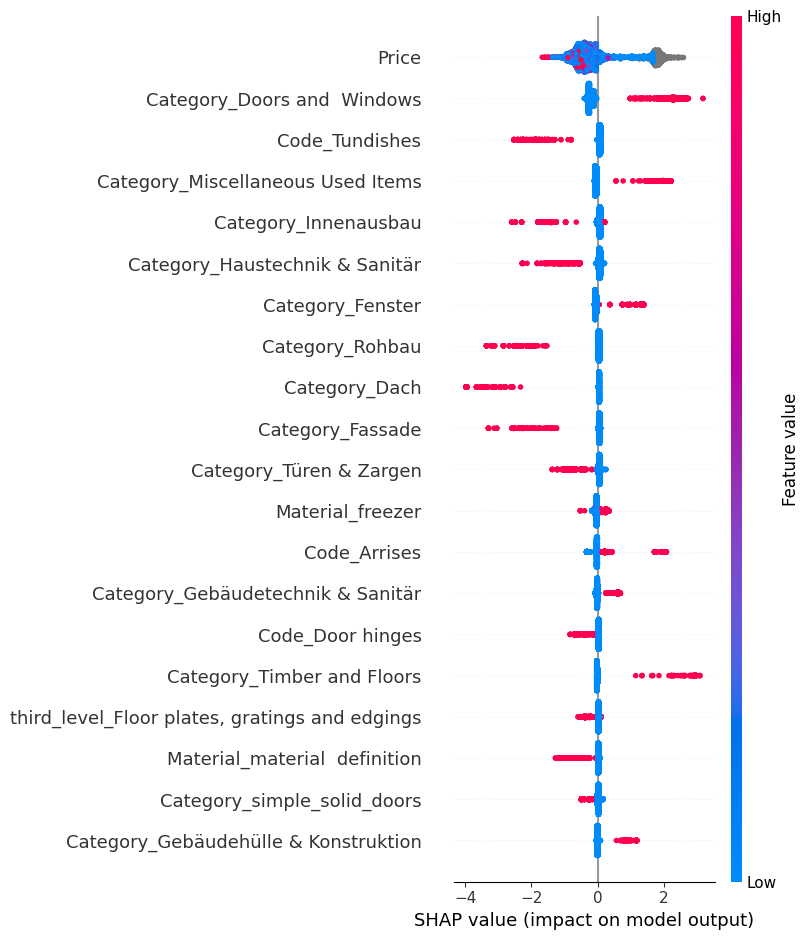

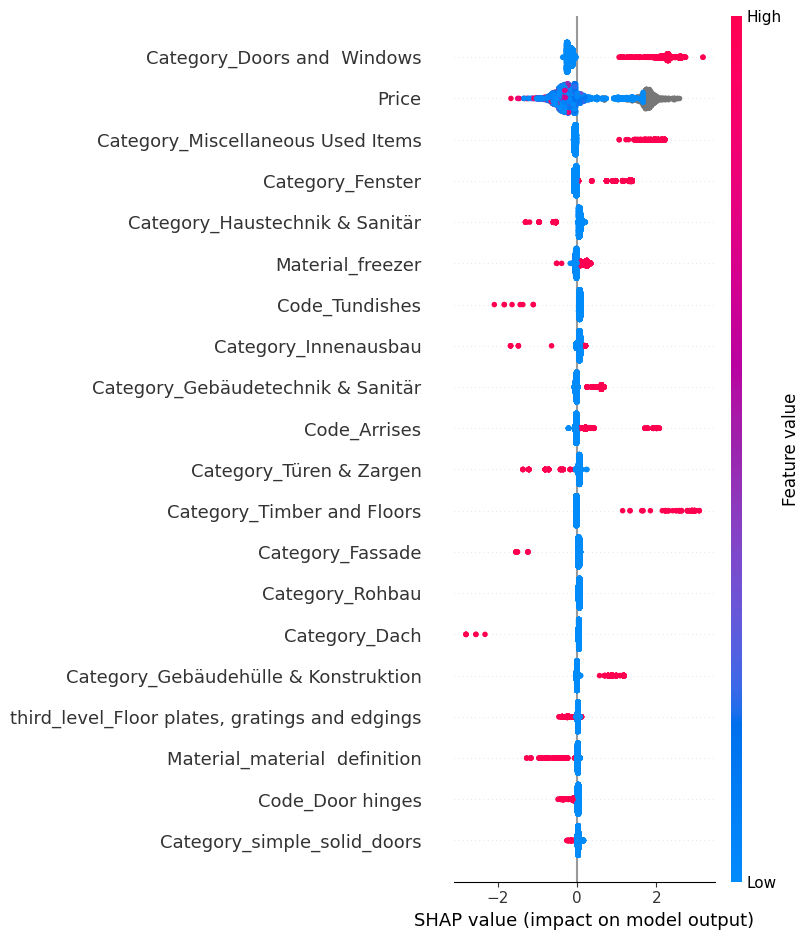

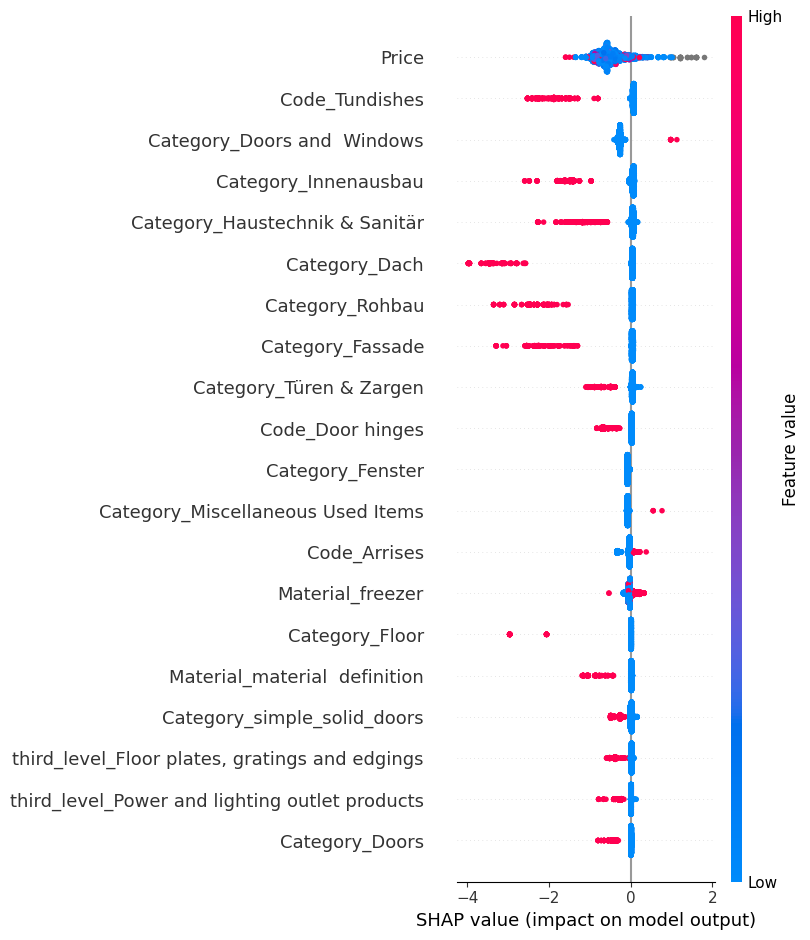

In [304]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.to_csv("tables/merged_importances.csv")
# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [305]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)


from sklearn.ensemble import HistGradientBoostingClassifier 

# Create and train the Random Forest classifier
model_rf = HistGradientBoostingClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)

print("HistGradientBoostingClassifier  Accuracy:", accuracy_rf)
print("HistGradientBoostingClassifier  Report:\n", report_rf)


Random Forest Accuracy: 0.8436336559940432
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.64      0.74       941
         1.0       0.83      0.95      0.89      1745

    accuracy                           0.84      2686
   macro avg       0.86      0.80      0.81      2686
weighted avg       0.85      0.84      0.84      2686

HistGradientBoostingClassifier  Accuracy: 0.8369322412509308
HistGradientBoostingClassifier  Report:
               precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       941
         1.0       0.85      0.90      0.88      1745

    accuracy                           0.84      2686
   macro avg       0.83      0.81      0.82      2686
weighted avg       0.83      0.84      0.83      2686



In [306]:
date_ = []
count_entity = []
merged_table_ = merged_table.dropna(subset="Days")

for item in merged_table_.Code.unique():
    date = merged_table_.Days[merged_table.Code == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    date_.append(np.mean(date))

df = pd.DataFrame({"Code": merged_table_.Code.unique(), "SoldAfterDays": date_, "CountEntity":count_entity}).dropna()


In [307]:
df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects[:30]

,Code,SoldAfterDays,CountEntity,Rank_SoldAfterDays,Rank_CountEntity,Score
501,Heat emitters,31.981132,53,9.0,38.0,47.0
413,Frameless glass door leaves,62.863309,139,36.0,13.0,49.0
315,Refrigerators,54.653846,78,31.0,24.0,55.0
598,Mesh panels,41.830189,53,18.0,38.0,56.0
442,Wood panelled door leaves,53.159420,69,28.0,28.0,56.0
390,Roofing swags,46.672727,55,21.0,37.0,58.0
154,Uncontrolled door closers,89.044586,471,57.0,3.0,60.0
98,Concrete bollards,68.581081,74,38.0,26.0,64.0
912,Paving primers,5.346154,26,1.0,71.0,72.0
43,Door hinges,103.033486,657,75.0,2.0,77.0


In [276]:
worst_objects = successful_objects[-30:-1]
worst_objects

,Code,SoldAfterDays,CountEntity,Rank_SoldAfterDays,Rank_CountEntity,Score
95,Towels,208.444444,9,211.0,158.0,369.0
375,Wood-burning stoves,164.166667,6,159.0,215.0,374.0
54,Garden furnishings,243.800000,10,225.0,151.0,376.0
48,Sanitary towel dispensers,182.428571,7,185.0,191.0,376.0
41,Guard barriers,184.428571,7,188.0,191.0,379.0
326,Commercial gas griddles,185.142857,7,191.0,191.0,382.0
357,Cylinder locks,186.571429,7,194.0,191.0,385.0
380,Stools,174.333333,6,171.0,215.0,386.0
46,Playground bark,187.857143,7,196.0,191.0,387.0
548,Concrete quadrant and angle kerbs,214.000000,8,214.0,173.0,387.0


In [277]:
prices_new = prices_new[prices_new.prices_Raw.notna()]
prices_new

,Price,Basic Price,Description,material_emb,prices_Raw
45,3.0,3.0,Planche brute de sciage imprégnée Gris 3 m,IfcMaterialDefinition,Pr_20_29_60_34
59,56.0,NaN,Conifère Urban living Wood profilé U brut de s...,IfcCableSegment.WIREPAIRSEGMENT,Pr_30_59_09_93
60,38.0,NaN,Conifère Urban living Wood profilé U brut de s...,IfcCableSegment.WIREPAIRSEGMENT,Pr_30_59_09_93
85,18.0,NaN,Tesamoll For Textiles Profilé d'isolation bas ...,IfcAudioVisualAppliance.TUNER,Pr_25_57_90_29
132,17.0,NaN,Profil cylindre 40/45 avec 3 clés,IfcCableCarrierSegment.CABLETRAYSEGMENT,Pr_30_36_08_19
...,...,...,...,...,...
8356,67.0,NaN,Mini compresseur d'air KPS-7/12 A,IfcFlowController,Pr_65_67_16_02
8358,6.0,NaN,Cartrend Bidon d'essence plastique Noir 5 l,IfcSensor.SNOWDEPTHSENSOR,Pr_60_50_46
8359,7.0,NaN,Bidon de réserve de carburant Noir 5 l,IfcSensor.SNOWDEPTHSENSOR,Pr_60_50_46
8368,19.0,NaN,Cartrend Bidon d'essence Quick avec col de rem...,IfcSensor.SNOWDEPTHSENSOR,Pr_60_50_46


In [279]:
merged_table.columns

Index(['Title', 'Category', 'Price', 'Material', 'Code', 'Sold', 'Days',
       'Imagefile'],
      dtype='object')

In [308]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import json
# Assuming 'successful_objects' dataframe contains the data
results = []

merged_table1 = merged_table.copy()
merged_table1 = merged_table1.dropna(subset=["Code", "Sold"])


best_features = successful_objects.iloc[:, :].reset_index(drop=True)  # Extracting top 15 features

for i in range(30):
    merged_test = merged_table1[merged_table1.Code.str.contains(best_features.Code[i])]

    categorical_columns = ["Category", "Material", "Code", 'second_level', 'third_level']  # Update with your categorical columns
    numeric_columns = ['Price']

    df = merged_test[categorical_columns+numeric_columns]

    df_dummies = pd.get_dummies(df, columns=categorical_columns)


    # Separate features and target
    X = df_dummies # Replace 'Sold' with your target column name
    y = merged_test['Sold'].astype(int)  # Target variable

    if len(y.unique())==2 and len(y[y==0])>2:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the XGBoost classifier
        model_xgb = xgb.XGBClassifier(random_state=42)
        model_xgb.fit(X_train, y_train)

        # Predict on the test set
        predictions = model_xgb.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions)

        # Get feature importances
        importances = model_xgb.feature_importances_
        feature_names = X_train.columns

        # Create a DataFrame for easy visualization
        feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

        # Sort the DataFrame by importance
        feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

        results.append({"Code":best_features.Code[i], "report": report, "features": feature_importances})


results = pd.DataFrame(results)
results.to_csv("classifications/classification_results_merged.csv")

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined an